# Problem Statement

Lending is one of the critical functions of any bank or financial institution. Customers are provided loans across different products (home loan, loan against property etc.) at competitive interest rates for an acceptable tenure. There is always a risk that a customer may default on the loan or may try and repay the loan in advance which leads to financial losses to the business.  

There may not be enough data or evidence available from the past which will help the firm to predict the loan default or prepayment and mitigate the above possible risk. However, it does have information about the customer demographics, loan details, EMI transactions etc. which contributes to more than 25-30 features (high-dimension data) related to a customer’s loan account. But due to high dimensions it is difficult to identify any patterns within the data. Unsupervised learning techniques like Principal Component Analysis comes to rescue here to reduce the high dimensionality and help in further analysis and pattern recognition. 

## About Data

Data file contains information about the loan transactions done by the customer. 

All important details regarding the loan i.e. loan amount, interest rate, outstanding principal, loan to value ratio (Net LTV), tenure, city where the loan was originated etc. has been provided. 

Some of the features that correspond to multiple loan transactions (e.g. rate of interest, emi amount, frequency of emi payment etc.) for a loan account are summarized and captured for each loan account.

### Import  required libraries

In [2]:
!pip install factor_analyzer 

  Created wheel for factor-analyzer: filename=factor_analyzer-0.3.2-py3-none-any.whl size=40383 sha256=afff9f8129fd8c1271f22a4bd92bbd83addc0033817654d4402bc07cc3a4b9c4
  Stored in directory: c:\users\hp\appdata\local\pip\cache\wheels\b1\d4\b5\9da0e0e81266e87f5e85068f031077c8a2ae0eedf76ea1d294
Successfully built factor-analyzer


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from factor_analyzer import FactorAnalyzer
import warnings
warnings.filterwarnings("ignore")

### Read and view data

In [4]:
df = pd.read_excel('Short Term Home Loans.xlsx')

In [5]:
df.head()

,loan_account,age,gender,marital_status,qualification,gross_income,nettakehome,balance_tenure,city,completed_tenure,...,num_emi_changes,num_low_freq_transactions,num_of_emi_transactions,orignal_interest_rate,orignal_tenor,outstanding_principal,paid_interest,paid_principal,pre_emi_dueamt,pre_emi_received_amt
0,LA492,39,F,M,UG,63542.344735,63542.344735,111,MADURAI,70,...,11,10,73,17.479728,180,9.882910e+05,9.340537e+05,212745.625226,39959.331336,39959.331336
1,LA498,51,M,M,GRAD,81130.025032,81130.025032,107,MADURAI,68,...,3,11,73,17.479728,180,1.206218e+06,1.069305e+06,295078.188194,78774.632736,78774.632736
2,LA500,41,M,M,UG,56298.592500,56298.592500,50,MADURAI,70,...,13,10,73,17.479728,120,7.137100e+05,8.303592e+05,487326.621863,37918.629288,37918.629288
3,LA531,42,M,M,UG,74314.142100,74314.142100,110,MADURAI,70,...,13,17,72,17.479728,180,1.744746e+06,1.567354e+06,357068.193072,29375.950152,29375.950152
4,LA552,27,M,S,GRAD,64255.460240,64255.460240,112,MADURAI,69,...,14,10,71,17.479728,180,1.502039e+06,1.355995e+06,299516.018579,46048.309200,46048.309200


In [6]:
df.shape

(2319, 42)

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,2319.0,3.945106e+01,8.982396e+00,1.800000e+01,3.200000e+01,3.900000e+01,4.600000e+01,6.500000e+01
gross_income,2319.0,8.260822e+04,1.264007e+05,0.000000e+00,4.189591e+04,6.184963e+04,9.118946e+04,4.261664e+06
nettakehome,2319.0,8.134619e+04,1.268459e+05,0.000000e+00,4.109947e+04,6.050222e+04,9.046402e+04,4.261664e+06
balance_tenure,2319.0,1.466628e+02,4.513873e+01,0.000000e+00,1.290000e+02,1.500000e+02,1.670000e+02,3.070000e+02
completed_tenure,2319.0,2.950367e+01,1.349025e+01,0.000000e+00,2.200000e+01,2.800000e+01,3.700000e+01,7.000000e+01
current_interest_rate,2319.0,1.569870e+01,1.872893e+00,1.107466e+01,1.404621e+01,1.591904e+01,1.747973e+01,1.997683e+01
current_interest_rate_max,2319.0,1.578384e+01,1.832462e+00,1.107466e+01,1.435835e+01,1.591904e+01,1.747973e+01,1.997683e+01
current_interest_rate_min,2319.0,1.568473e+01,1.875045e+00,1.107466e+01,1.404621e+01,1.591904e+01,1.747973e+01,1.997683e+01
current_tenor,2319.0,1.759711e+02,4.224263e+01,1.000000e+01,1.730000e+02,1.800000e+02,1.810000e+02,3.160000e+02
diff_current_interest_rate_max_min,2319.0,1.042883e-01,5.631563e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.201107e+01


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2319 entries, 0 to 2318
Data columns (total 42 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   loan_account                         2319 non-null   object 
 1   age                                  2319 non-null   int64  
 2   gender                               2319 non-null   object 
 3   marital_status                       2319 non-null   object 
 4   qualification                        2319 non-null   object 
 5   gross_income                         2319 non-null   float64
 6   nettakehome                          2319 non-null   float64
 7   balance_tenure                       2319 non-null   int64  
 8   city                                 2319 non-null   object 
 9   completed_tenure                     2319 non-null   int64  
 10  current_interest_rate                2319 non-null   float64
 11  current_interest_rate_max     

In [9]:
df.city.value_counts()

MUMBAI             586
HYDERABAD          268
AHMEDABAD          165
CHENNAI            164
MADURAI            157
COIMBATORE         156
SURAT              136
ERODE               85
PUNE                78
TIRUCHIRAPPALLI     78
KARUR               65
TUTICORIN           64
TIRUPUR             63
NAMAKKAL            56
WARANGAL            56
BANGALORE           45
VISHAKHAPATNAM      45
Hyd                 31
Mum                 21
Name: city, dtype: int64

In [10]:
df.gender.value_counts()

M    1994
F     325
Name: gender, dtype: int64

In [11]:
df.marital_status.value_counts()

M    2086
S     233
Name: marital_status, dtype: int64

In [12]:
df.qualification.value_counts()

UG          1548
GRAD         409
POSTGRAD     181
OTHERS       150
PRF           18
ENG            6
MAT            5
DOCTRATE       2
Name: qualification, dtype: int64

### Observations:

Data consists of 2319 customer loan transactions with 42 features 

Fields ‘diff_current_interest_rate_max_min’, ‘diff_original_current_interest_rate’, ‘diff_original_current_tenor’ have atleast 75% of the values as 0

Field 'excess_adjusted_amt' has atleast 50% of values as 0

There are no missing values in the data

We have 5 categorical fields gender, marital status, city and qualification. City field needs cleanup.

Very few observations available for customers with ENG, MAT, DOCTRATE qualification

### Data Cleanup

In [13]:
df.city.replace(to_replace='Mum',value='MUMBAI',inplace=True)
df.city.replace(to_replace='Hyd',value='HYDERABAD',inplace=True)
df.city.value_counts()

MUMBAI             607
HYDERABAD          299
AHMEDABAD          165
CHENNAI            164
MADURAI            157
COIMBATORE         156
SURAT              136
ERODE               85
PUNE                78
TIRUCHIRAPPALLI     78
KARUR               65
TUTICORIN           64
TIRUPUR             63
NAMAKKAL            56
WARANGAL            56
BANGALORE           45
VISHAKHAPATNAM      45
Name: city, dtype: int64

In [14]:
print('% of records with 0 value in diff_current_interest_rate_max_min field: {:.2%}'.format((df[df.diff_current_interest_rate_max_min == 0].shape[0])/df.shape[0]))
print('# of records with 0 value in diff_original_current_interest_rate field: {:.2%}'.format((df[df.diff_original_current_interest_rate == 0].shape[0])/df.shape[0]))
print('# of records with 0 value in diff_original_current_tenor field: {:.2%}'.format((df[df.diff_original_current_tenor == 0].shape[0])/df.shape[0]))
print('# of records with 0 value in excess_adjusted_amt field: {:.2%}'.format((df[df.excess_adjusted_amt == 0].shape[0])/df.shape[0]))

% of records with 0 value in diff_current_interest_rate_max_min field: 95.30%
# of records with 0 value in diff_original_current_interest_rate field: 96.03%
# of records with 0 value in diff_original_current_tenor field: 72.49%
# of records with 0 value in excess_adjusted_amt field: 67.96%


In [15]:
df.drop(['diff_current_interest_rate_max_min','diff_original_current_interest_rate','diff_original_current_tenor','excess_adjusted_amt'], axis=1, inplace=True)

### EDA

In [1]:
def univariateAnalysis_numeric(column,nbins):
    print("Description of " + column)
    print("----------------------------------------------------------------------------")
    print(df[column].describe(),end=' ')
    
    
    plt.figure()
    print("Distribution of " + column)
    print("----------------------------------------------------------------------------")
    sns.distplot(df[column], kde=False, color='g');
    plt.show()
    
    plt.figure()
    print("BoxPlot of " + column)
    print("----------------------------------------------------------------------------")
    ax = sns.boxplot(x=df[column])
    plt.show()

In [2]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
lstnumericcolumns = list(df_num.columns.values)
len(lstnumericcolumns)

NameError: name 'df' is not defined

In [18]:
df_num.head()

,age,gross_income,nettakehome,balance_tenure,completed_tenure,current_interest_rate,current_interest_rate_max,current_interest_rate_min,current_tenor,diff_emi_amount_max_min,...,num_emi_changes,num_low_freq_transactions,num_of_emi_transactions,orignal_interest_rate,orignal_tenor,outstanding_principal,paid_interest,paid_principal,pre_emi_dueamt,pre_emi_received_amt
0,39,63542.344735,63542.344735,111,70,17.479728,17.479728,17.479728,181,11557.38,...,11,10,73,17.479728,180,9.882910e+05,9.340537e+05,212745.625226,39959.331336,39959.331336
1,51,81130.025032,81130.025032,107,68,14.982624,17.479728,14.982624,175,13523.09,...,3,11,73,17.479728,180,1.206218e+06,1.069305e+06,295078.188194,78774.632736,78774.632736
2,41,56298.592500,56298.592500,50,70,17.479728,17.479728,17.479728,120,13608.59,...,13,10,73,17.479728,120,7.137100e+05,8.303592e+05,487326.621863,37918.629288,37918.629288
3,42,74314.142100,74314.142100,110,70,17.479728,17.479728,17.479728,180,38412.99,...,13,17,72,17.479728,180,1.744746e+06,1.567354e+06,357068.193072,29375.950152,29375.950152
4,27,64255.460240,64255.460240,112,69,17.479728,17.479728,17.479728,181,32346.11,...,14,10,71,17.479728,180,1.502039e+06,1.355995e+06,299516.018579,46048.309200,46048.309200


Description of age
----------------------------------------------------------------------------
count    2319.000000
mean       39.451056
std         8.982396
min        18.000000
25%        32.000000
50%        39.000000
75%        46.000000
max        65.000000
Name: age, dtype: float64 Distribution of age
----------------------------------------------------------------------------


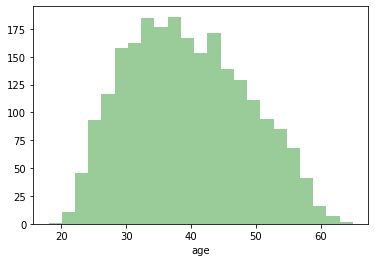

BoxPlot of age
----------------------------------------------------------------------------


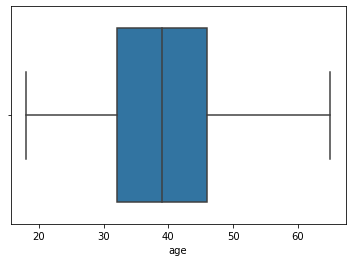

Description of gross_income
----------------------------------------------------------------------------
count    2.319000e+03
mean     8.260822e+04
std      1.264007e+05
min      0.000000e+00
25%      4.189591e+04
50%      6.184963e+04
75%      9.118946e+04
max      4.261664e+06
Name: gross_income, dtype: float64 Distribution of gross_income
----------------------------------------------------------------------------


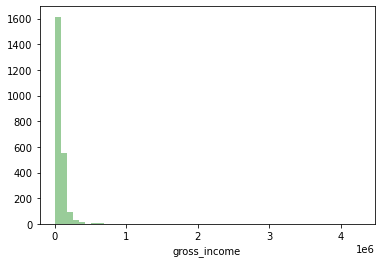

BoxPlot of gross_income
----------------------------------------------------------------------------


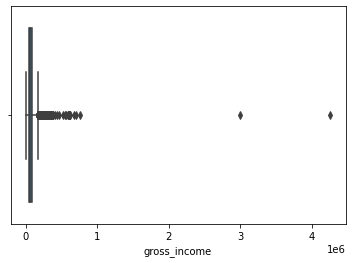

Description of nettakehome
----------------------------------------------------------------------------
count    2.319000e+03
mean     8.134619e+04
std      1.268459e+05
min      0.000000e+00
25%      4.109947e+04
50%      6.050222e+04
75%      9.046402e+04
max      4.261664e+06
Name: nettakehome, dtype: float64 Distribution of nettakehome
----------------------------------------------------------------------------


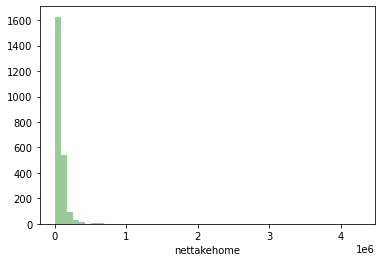

BoxPlot of nettakehome
----------------------------------------------------------------------------


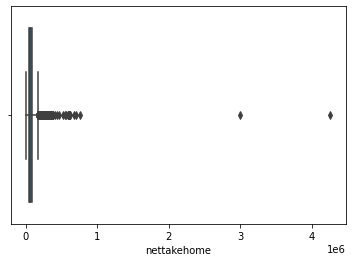

Description of balance_tenure
----------------------------------------------------------------------------
count    2319.000000
mean      146.662786
std        45.138729
min         0.000000
25%       129.000000
50%       150.000000
75%       167.000000
max       307.000000
Name: balance_tenure, dtype: float64 Distribution of balance_tenure
----------------------------------------------------------------------------


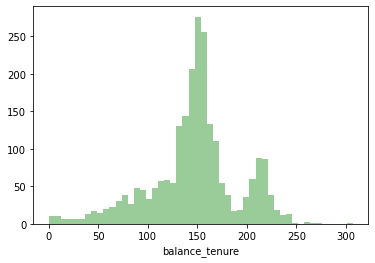

BoxPlot of balance_tenure
----------------------------------------------------------------------------


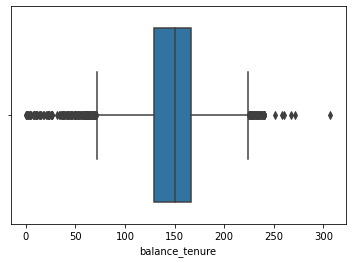

Description of completed_tenure
----------------------------------------------------------------------------
count    2319.000000
mean       29.503665
std        13.490253
min         0.000000
25%        22.000000
50%        28.000000
75%        37.000000
max        70.000000
Name: completed_tenure, dtype: float64 Distribution of completed_tenure
----------------------------------------------------------------------------


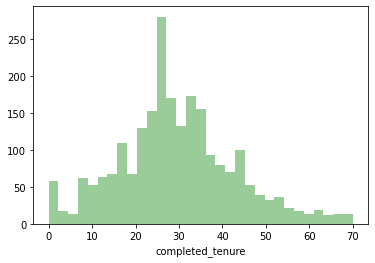

BoxPlot of completed_tenure
----------------------------------------------------------------------------


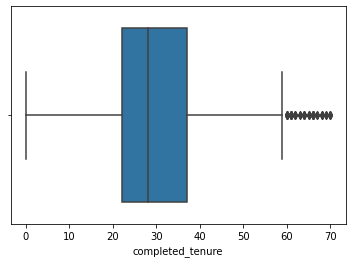

Description of current_interest_rate
----------------------------------------------------------------------------
count    2319.000000
mean       15.698703
std         1.872893
min        11.074656
25%        14.046210
50%        15.919038
75%        17.479728
max        19.976832
Name: current_interest_rate, dtype: float64 Distribution of current_interest_rate
----------------------------------------------------------------------------


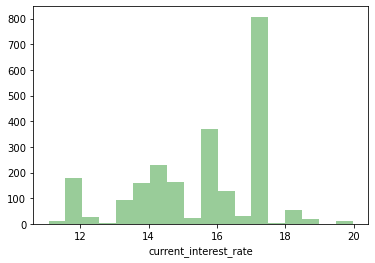

BoxPlot of current_interest_rate
----------------------------------------------------------------------------


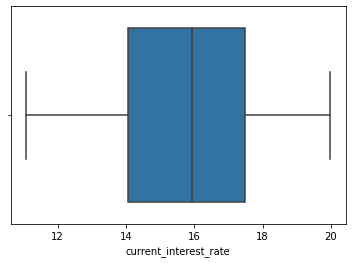

Description of current_interest_rate_max
----------------------------------------------------------------------------
count    2319.000000
mean       15.783840
std         1.832462
min        11.074656
25%        14.358348
50%        15.919038
75%        17.479728
max        19.976832
Name: current_interest_rate_max, dtype: float64 Distribution of current_interest_rate_max
----------------------------------------------------------------------------


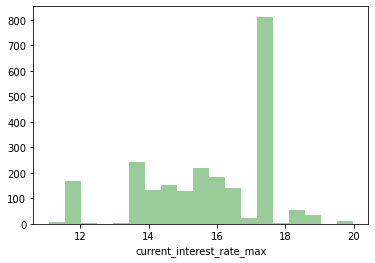

BoxPlot of current_interest_rate_max
----------------------------------------------------------------------------


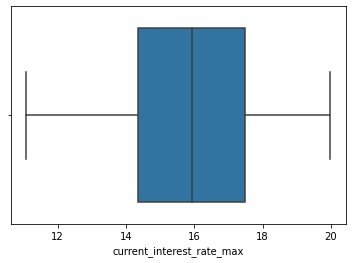

Description of current_interest_rate_min
----------------------------------------------------------------------------
count    2319.000000
mean       15.684731
std         1.875045
min        11.074656
25%        14.046210
50%        15.919038
75%        17.479728
max        19.976832
Name: current_interest_rate_min, dtype: float64 Distribution of current_interest_rate_min
----------------------------------------------------------------------------


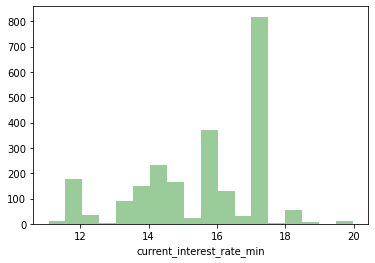

BoxPlot of current_interest_rate_min
----------------------------------------------------------------------------


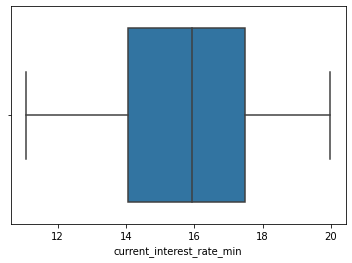

Description of current_tenor
----------------------------------------------------------------------------
count    2319.000000
mean      175.971108
std        42.242628
min        10.000000
25%       173.000000
50%       180.000000
75%       181.000000
max       316.000000
Name: current_tenor, dtype: float64 Distribution of current_tenor
----------------------------------------------------------------------------


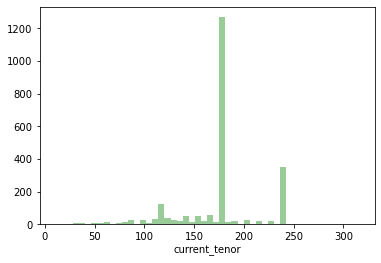

BoxPlot of current_tenor
----------------------------------------------------------------------------


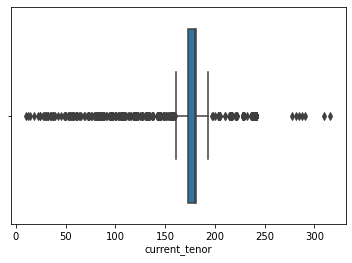

Description of diff_emi_amount_max_min
----------------------------------------------------------------------------
count    2.319000e+03
mean     5.635589e+04
std      1.959045e+05
min      0.000000e+00
25%      1.029850e+04
50%      1.735000e+04
75%      2.860478e+04
max      3.229383e+06
Name: diff_emi_amount_max_min, dtype: float64 Distribution of diff_emi_amount_max_min
----------------------------------------------------------------------------


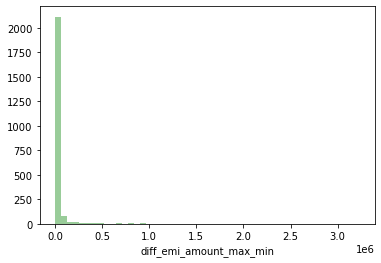

BoxPlot of diff_emi_amount_max_min
----------------------------------------------------------------------------


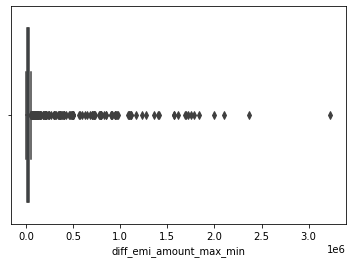

Description of emi_amount
----------------------------------------------------------------------------
count      2319.000000
mean      18012.023109
std       12373.175124
min          14.370000
25%        9727.000000
50%       14650.000000
75%       22640.000000
max      120000.000000
Name: emi_amount, dtype: float64 Distribution of emi_amount
----------------------------------------------------------------------------


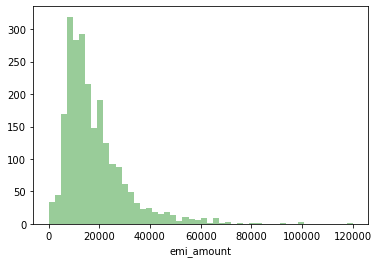

BoxPlot of emi_amount
----------------------------------------------------------------------------


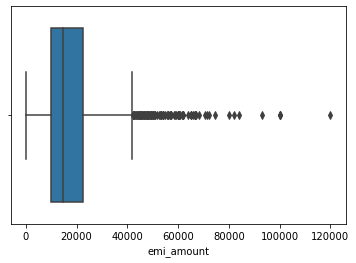

Description of emi_dueamt
----------------------------------------------------------------------------
count    2.319000e+03
mean     1.191197e+06
std      1.064387e+06
min      0.000000e+00
25%      5.517018e+05
50%      8.936884e+05
75%      1.453225e+06
max      9.853225e+06
Name: emi_dueamt, dtype: float64 Distribution of emi_dueamt
----------------------------------------------------------------------------


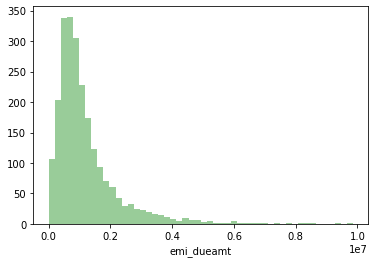

BoxPlot of emi_dueamt
----------------------------------------------------------------------------


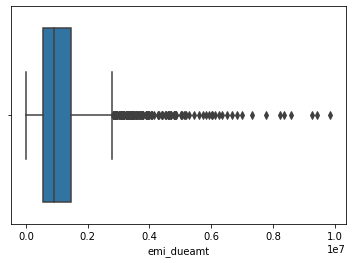

Description of emi_received_amt
----------------------------------------------------------------------------
count    2.319000e+03
mean     1.132347e+06
std      9.800945e+05
min      0.000000e+00
25%      5.325923e+05
50%      8.662891e+05
75%      1.397185e+06
max      9.853225e+06
Name: emi_received_amt, dtype: float64 Distribution of emi_received_amt
----------------------------------------------------------------------------


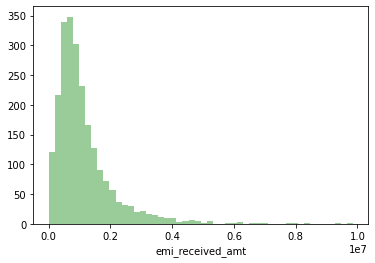

BoxPlot of emi_received_amt
----------------------------------------------------------------------------


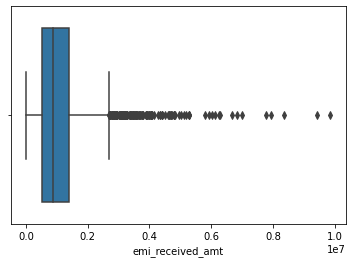

Description of excess_available
----------------------------------------------------------------------------
count    2.319000e+03
mean     1.865469e+05
std      7.175169e+05
min      0.000000e+00
25%      0.000000e+00
50%      1.727088e+02
75%      3.881751e+03
max      1.021953e+07
Name: excess_available, dtype: float64 Distribution of excess_available
----------------------------------------------------------------------------


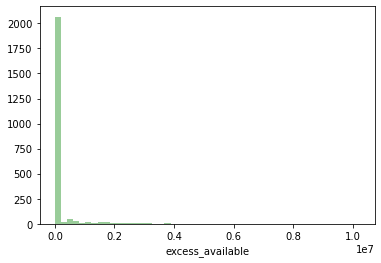

BoxPlot of excess_available
----------------------------------------------------------------------------


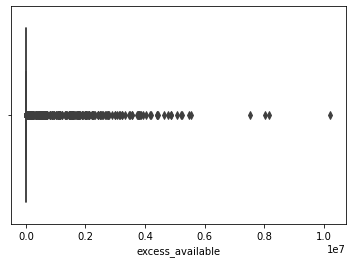

Description of foir
----------------------------------------------------------------------------
count    2319.000000
mean        0.426229
std         0.146320
min         0.000000
25%         0.340000
50%         0.420000
75%         0.490000
max         1.001000
Name: foir, dtype: float64 Distribution of foir
----------------------------------------------------------------------------


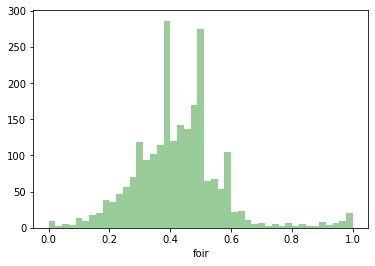

BoxPlot of foir
----------------------------------------------------------------------------


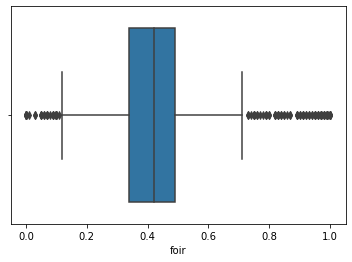

Description of last_receipt_amount
----------------------------------------------------------------------------
count    2.319000e+03
mean     4.114352e+04
std      1.748835e+05
min      2.000000e+00
25%      9.316000e+03
50%      1.440500e+04
75%      2.307700e+04
max      3.229945e+06
Name: last_receipt_amount, dtype: float64 Distribution of last_receipt_amount
----------------------------------------------------------------------------


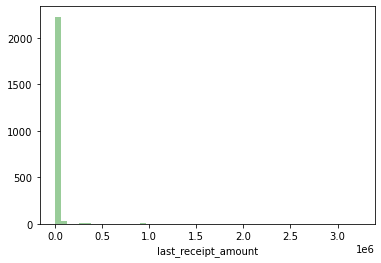

BoxPlot of last_receipt_amount
----------------------------------------------------------------------------


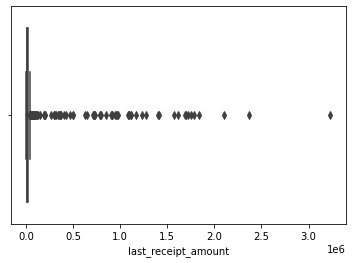

Description of loan_amt
----------------------------------------------------------------------------
count    2.319000e+03
mean     2.194991e+06
std      1.349637e+06
min      1.756516e+05
25%      1.238569e+06
50%      1.801555e+06
75%      2.818683e+06
max      1.089366e+07
Name: loan_amt, dtype: float64 Distribution of loan_amt
----------------------------------------------------------------------------


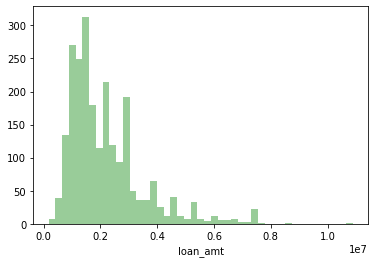

BoxPlot of loan_amt
----------------------------------------------------------------------------


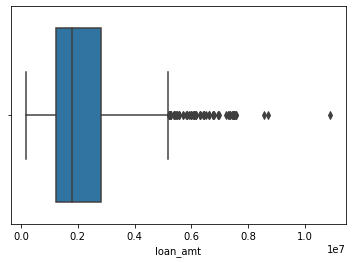

Description of max_emi_amount
----------------------------------------------------------------------------
count    2.319000e+03
mean     5.807497e+04
std      1.960221e+05
min      5.620000e+02
25%      1.157300e+04
50%      1.897500e+04
75%      2.967650e+04
max      3.229945e+06
Name: max_emi_amount, dtype: float64 Distribution of max_emi_amount
----------------------------------------------------------------------------


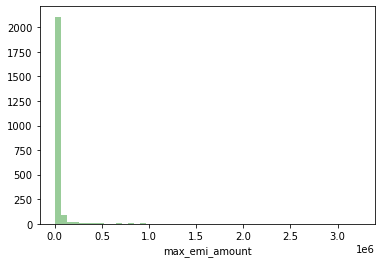

BoxPlot of max_emi_amount
----------------------------------------------------------------------------


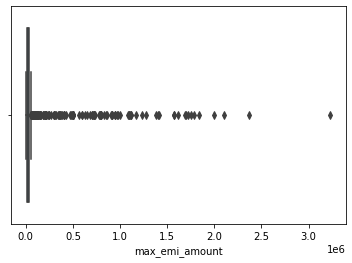

Description of min_emi_amount
----------------------------------------------------------------------------
count     2319.000000
mean      1723.590298
std       5332.764547
min          0.090000
25%        115.000000
50%        115.000000
75%        573.000000
max      84001.000000
Name: min_emi_amount, dtype: float64 Distribution of min_emi_amount
----------------------------------------------------------------------------


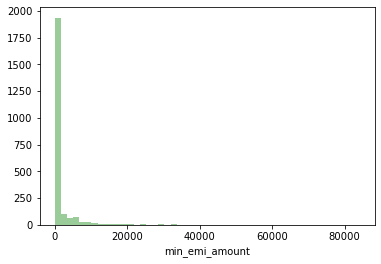

BoxPlot of min_emi_amount
----------------------------------------------------------------------------


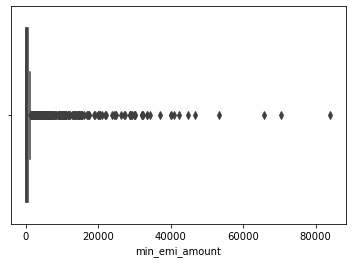

Description of monthopening
----------------------------------------------------------------------------
count    2.319000e+03
mean     2.035442e+06
std      1.286849e+06
min      1.514357e+05
25%      1.135780e+06
50%      1.688189e+06
75%      2.620309e+06
max      1.080242e+07
Name: monthopening, dtype: float64 Distribution of monthopening
----------------------------------------------------------------------------


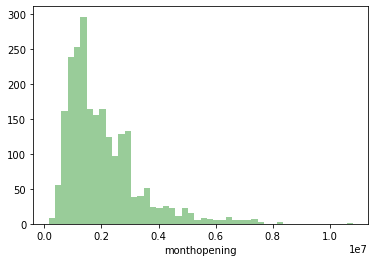

BoxPlot of monthopening
----------------------------------------------------------------------------


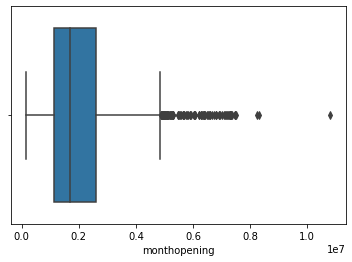

Description of net_disbursed_amt
----------------------------------------------------------------------------
count    2.319000e+03
mean     2.189517e+06
std      1.349531e+06
min      1.756516e+05
25%      1.231063e+06
50%      1.801555e+06
75%      2.800199e+06
max      1.089366e+07
Name: net_disbursed_amt, dtype: float64 Distribution of net_disbursed_amt
----------------------------------------------------------------------------


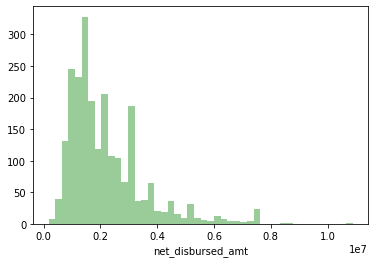

BoxPlot of net_disbursed_amt
----------------------------------------------------------------------------


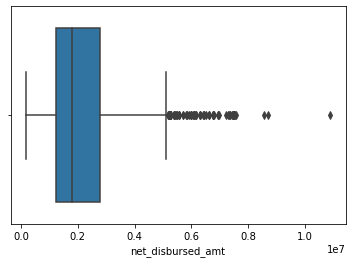

Description of net_ltv
----------------------------------------------------------------------------
count    2319.000000
mean       51.570013
std        18.757921
min         5.220000
25%        36.800000
50%        52.070000
75%        68.890000
max        84.390000
Name: net_ltv, dtype: float64 Distribution of net_ltv
----------------------------------------------------------------------------


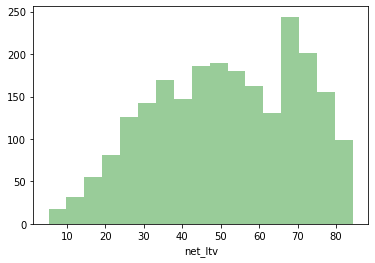

BoxPlot of net_ltv
----------------------------------------------------------------------------


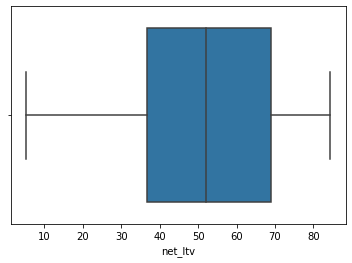

Description of net_receivable
----------------------------------------------------------------------------
count    2.319000e+03
mean     4.978290e+03
std      5.257671e+05
min     -7.133502e+06
25%     -3.259933e+02
50%     -4.417104e-01
75%      0.000000e+00
max      8.252080e+06
Name: net_receivable, dtype: float64 Distribution of net_receivable
----------------------------------------------------------------------------


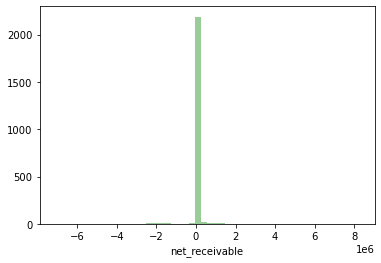

BoxPlot of net_receivable
----------------------------------------------------------------------------


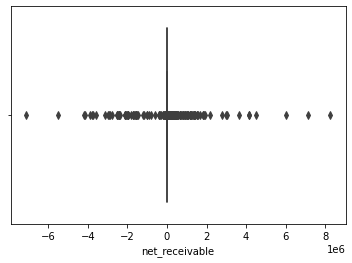

Description of num_emi_changes
----------------------------------------------------------------------------
count    2319.000000
mean        5.356188
std         3.809970
min         0.000000
25%         3.000000
50%         4.000000
75%         7.000000
max        27.000000
Name: num_emi_changes, dtype: float64 Distribution of num_emi_changes
----------------------------------------------------------------------------


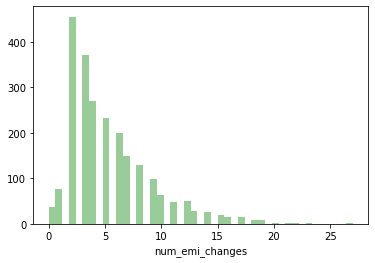

BoxPlot of num_emi_changes
----------------------------------------------------------------------------


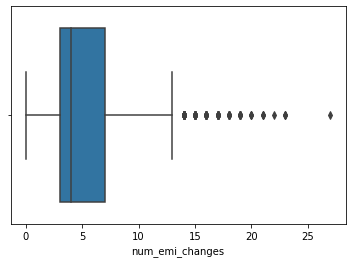

Description of num_low_freq_transactions
----------------------------------------------------------------------------
count    2319.000000
mean        4.567486
std         3.610644
min         0.000000
25%         2.000000
50%         3.000000
75%         6.000000
max        21.000000
Name: num_low_freq_transactions, dtype: float64 Distribution of num_low_freq_transactions
----------------------------------------------------------------------------


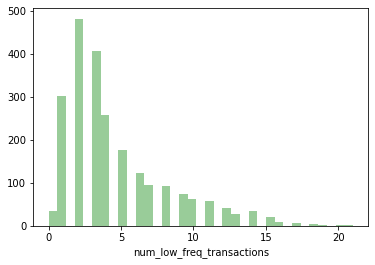

BoxPlot of num_low_freq_transactions
----------------------------------------------------------------------------


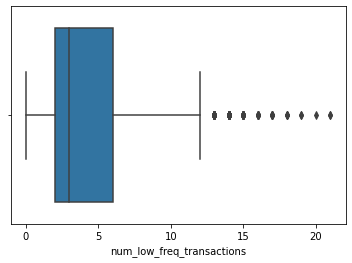

Description of num_of_emi_transactions
----------------------------------------------------------------------------
count    2319.000000
mean       32.156102
std        13.251947
min         0.000000
25%        24.000000
50%        31.000000
75%        40.000000
max        73.000000
Name: num_of_emi_transactions, dtype: float64 Distribution of num_of_emi_transactions
----------------------------------------------------------------------------


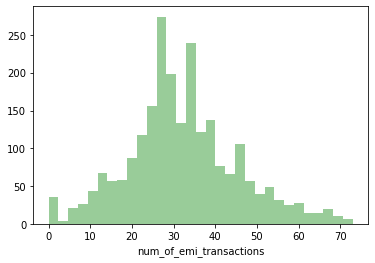

BoxPlot of num_of_emi_transactions
----------------------------------------------------------------------------


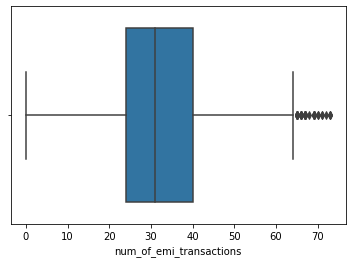

Description of orignal_interest_rate
----------------------------------------------------------------------------
count    2319.000000
mean       15.768140
std         1.814290
min        11.074656
25%        14.358348
50%        15.919038
75%        17.479728
max        19.976832
Name: orignal_interest_rate, dtype: float64 Distribution of orignal_interest_rate
----------------------------------------------------------------------------


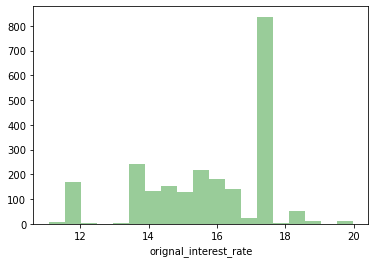

BoxPlot of orignal_interest_rate
----------------------------------------------------------------------------


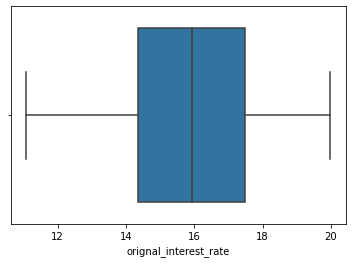

Description of orignal_tenor
----------------------------------------------------------------------------
count    2319.000000
mean      180.867615
std        35.859160
min        60.000000
25%       180.000000
50%       180.000000
75%       180.000000
max       240.000000
Name: orignal_tenor, dtype: float64 Distribution of orignal_tenor
----------------------------------------------------------------------------


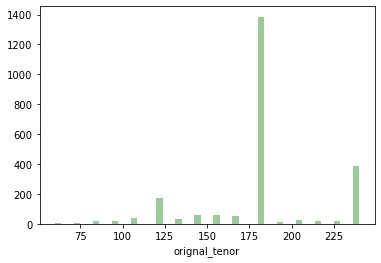

BoxPlot of orignal_tenor
----------------------------------------------------------------------------


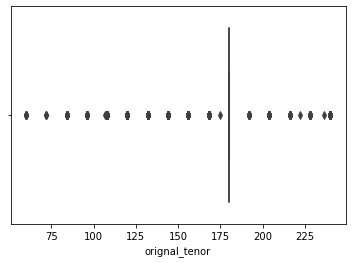

Description of outstanding_principal
----------------------------------------------------------------------------
count    2.319000e+03
mean     1.949442e+06
std      1.289269e+06
min      0.000000e+00
25%      1.065798e+06
50%      1.606862e+06
75%      2.546081e+06
max      1.080242e+07
Name: outstanding_principal, dtype: float64 Distribution of outstanding_principal
----------------------------------------------------------------------------


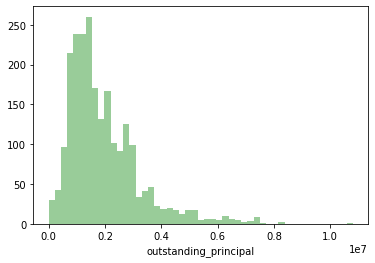

BoxPlot of outstanding_principal
----------------------------------------------------------------------------


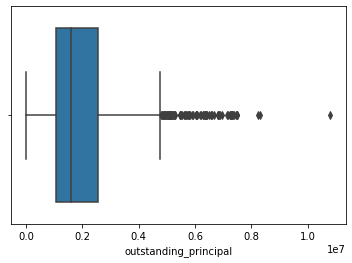

Description of paid_interest
----------------------------------------------------------------------------
count    2.319000e+03
mean     6.538977e+05
std      5.553356e+05
min      0.000000e+00
25%      3.083669e+05
50%      5.082382e+05
75%      8.067100e+05
max      5.588191e+06
Name: paid_interest, dtype: float64 Distribution of paid_interest
----------------------------------------------------------------------------


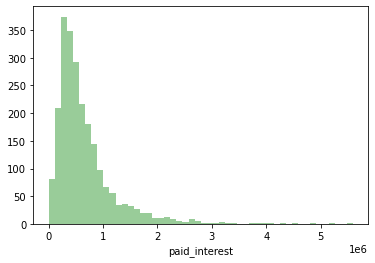

BoxPlot of paid_interest
----------------------------------------------------------------------------


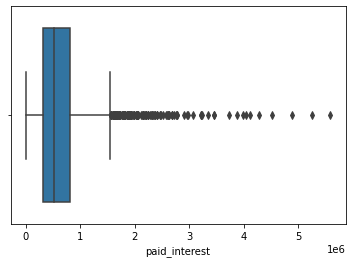

Description of paid_principal
----------------------------------------------------------------------------
count    2.319000e+03
mean     2.389494e+05
std      4.546814e+05
min      0.000000e+00
25%      6.463679e+04
50%      1.159271e+05
75%      2.208857e+05
max      7.458322e+06
Name: paid_principal, dtype: float64 Distribution of paid_principal
----------------------------------------------------------------------------


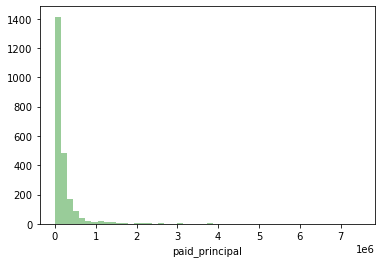

BoxPlot of paid_principal
----------------------------------------------------------------------------


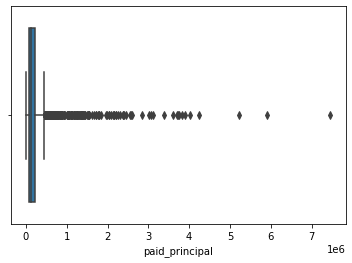

Description of pre_emi_dueamt
----------------------------------------------------------------------------
count    2.319000e+03
mean     5.630330e+04
std      1.176218e+05
min      0.000000e+00
25%      5.852663e+03
50%      1.687113e+04
75%      5.423541e+04
max      1.624202e+06
Name: pre_emi_dueamt, dtype: float64 Distribution of pre_emi_dueamt
----------------------------------------------------------------------------


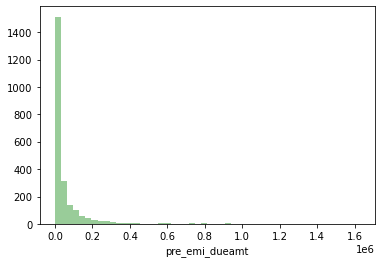

BoxPlot of pre_emi_dueamt
----------------------------------------------------------------------------


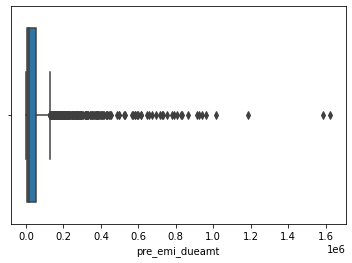

Description of pre_emi_received_amt
----------------------------------------------------------------------------
count    2.319000e+03
mean     5.562086e+04
std      1.155979e+05
min      0.000000e+00
25%      5.848246e+03
50%      1.687113e+04
75%      5.423541e+04
max      1.585701e+06
Name: pre_emi_received_amt, dtype: float64 Distribution of pre_emi_received_amt
----------------------------------------------------------------------------


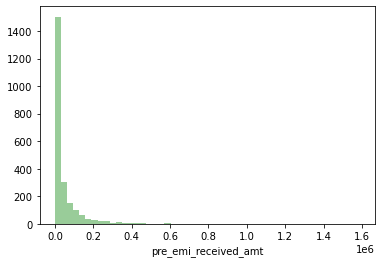

BoxPlot of pre_emi_received_amt
----------------------------------------------------------------------------


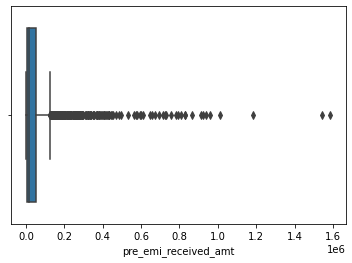

In [19]:
for x in lstnumericcolumns:
    univariateAnalysis_numeric(x,20)

### Observations

- There are 33 numeric fields in the data

- Customer age ranges from 18 years to 65 years

- Only few customers have gross income more than 30L

- Current interest rate ranges from 11.07% to 19.97% with an average of 16% 

- gross_income & nettakehome have minimum values as 0. Needs to be cleaned

- balance_tenure =0 (loans closed). Check outstanding_principal for these loans

- Average EMI amount being paid is around 18012

- Net Receivable of atleast 75% of customers is negative indicating that most of the customers are paying off the loan in advance 

- Average foir is 0.42

- Loan amount ranges from 175652 to max of 10893660

- Outliers to be treated

In [20]:
df[df.gross_income==0]

,loan_account,age,gender,marital_status,qualification,gross_income,nettakehome,balance_tenure,city,completed_tenure,...,num_emi_changes,num_low_freq_transactions,num_of_emi_transactions,orignal_interest_rate,orignal_tenor,outstanding_principal,paid_interest,paid_principal,pre_emi_dueamt,pre_emi_received_amt
106,LA928,29,F,M,GRAD,0.0,0.0,159,COIMBATORE,21,...,1,1,21,17.479728,180,8.944886e+05,228711.906059,36314.844106,6923.810520,6923.810520
616,LA2297,54,F,M,UG,0.0,0.0,87,NAMAKKAL,45,...,3,4,46,17.479728,132,1.217339e+06,730542.546646,283956.588908,12884.692368,12884.692368
640,LA2348,46,M,M,OTHERS,0.0,0.0,138,MUMBAI,42,...,5,4,43,17.479728,180,6.839979e+05,361987.939409,66650.027041,12884.692368,12884.692368
1198,LA3410,35,M,M,GRAD,0.0,0.0,153,MUMBAI,28,...,4,4,35,14.670486,180,2.328519e+06,783168.969620,163632.234425,177258.383520,177258.383520
2315,LA5726,34,M,M,UG,0.0,0.0,240,MUMBAI,0,...,7,8,18,14.358348,240,1.280237e+06,130587.212571,0.000000,316114.464864,192106.478616


In [21]:
df[df.nettakehome==0]

,loan_account,age,gender,marital_status,qualification,gross_income,nettakehome,balance_tenure,city,completed_tenure,...,num_emi_changes,num_low_freq_transactions,num_of_emi_transactions,orignal_interest_rate,orignal_tenor,outstanding_principal,paid_interest,paid_principal,pre_emi_dueamt,pre_emi_received_amt
8,LA570,44,M,M,GRAD,90077.748000,0.0,0,CHENNAI,49,...,2,6,50,17.479728,180,0.000000e+00,1.213050e+06,3.753240e+06,10737.979824,10737.979824
106,LA928,29,F,M,GRAD,0.000000,0.0,159,COIMBATORE,21,...,1,1,21,17.479728,180,8.944886e+05,2.287119e+05,3.631484e+04,6923.810520,6923.810520
307,LA1496,25,F,S,GRAD,75759.889955,0.0,186,CHENNAI,54,...,2,1,55,17.479728,240,3.396424e+06,2.233865e+06,2.066864e+05,30919.728000,30919.728000
395,LA1783,44,M,M,OTHERS,15012.958000,0.0,138,HYDERABAD,42,...,9,6,50,17.479728,180,2.081138e+06,1.138929e+06,1.708054e+05,282875.757264,282875.757264
521,LA2100,34,M,S,UG,40228.722257,0.0,85,TUTICORIN,40,...,15,11,46,17.479728,156,8.974986e+05,5.893742e+05,3.035380e+05,106719.441192,106719.441192
545,LA2147,47,M,M,OTHERS,105090.706000,0.0,120,CHENNAI,45,...,3,2,46,17.479728,180,2.635998e+06,1.503699e+06,4.416587e+05,26412.073368,26412.073368
616,LA2297,54,F,M,UG,0.000000,0.0,87,NAMAKKAL,45,...,3,4,46,17.479728,132,1.217339e+06,7.305425e+05,2.839566e+05,12884.692368,12884.692368
640,LA2348,46,M,M,OTHERS,0.000000,0.0,138,MUMBAI,42,...,5,4,43,17.479728,180,6.839979e+05,3.619879e+05,6.665003e+04,12884.692368,12884.692368
662,LA2392,60,M,M,GRAD,89787.997911,0.0,53,MADURAI,44,...,4,2,45,14.982624,96,1.195590e+06,6.926213e+05,6.254819e+05,23227.341384,23227.341384
664,LA2395,48,F,M,UG,30660.964123,0.0,196,HYDERABAD,44,...,18,10,45,14.358348,240,1.084249e+06,4.744590e+05,6.574324e+04,14053.016376,14053.016376


In [22]:
df.gross_income.replace(to_replace=0, value=df.gross_income.median(),inplace=True)
df.nettakehome.replace(to_replace=0, value=df.nettakehome.median(),inplace=True)

In [23]:
df.gross_income.describe()

count    2.319000e+03
mean     8.274157e+04
std      1.263460e+05
min      1.250579e+01
25%      4.203628e+04
50%      6.184963e+04
75%      9.118946e+04
max      4.261664e+06
Name: gross_income, dtype: float64

In [24]:
# Closed loans
df[df.balance_tenure==0]

,loan_account,age,gender,marital_status,qualification,gross_income,nettakehome,balance_tenure,city,completed_tenure,...,num_emi_changes,num_low_freq_transactions,num_of_emi_transactions,orignal_interest_rate,orignal_tenor,outstanding_principal,paid_interest,paid_principal,pre_emi_dueamt,pre_emi_received_amt
8,LA570,44,M,M,GRAD,90077.748,60502.22074,0,CHENNAI,49,...,2,6,50,17.479728,180,0.0,1.213050e+06,3.753240e+06,10737.979824,10737.979824
25,LA661,37,M,M,OTHERS,112597.185,112597.18500,0,COIMBATORE,56,...,1,2,61,17.479728,180,0.0,2.141698e+06,4.018367e+06,243530.403384,243530.403384


### Observation

From above records looks like there are customers who are making advance payments to pay off their loan earlier. 

num_low_freq_transactions maybe a field that will help us find these customers

In [25]:
df.num_low_freq_transactions.describe()

count    2319.000000
mean        4.567486
std         3.610644
min         0.000000
25%         2.000000
50%         3.000000
75%         6.000000
max        21.000000
Name: num_low_freq_transactions, dtype: float64

In [26]:
# Probable customers who are paying off their loans earlier
df_prepayment = df[df.num_low_freq_transactions > 6]
df_prepayment[['orignal_tenor','current_tenor','balance_tenure','completed_tenure']]

,orignal_tenor,current_tenor,balance_tenure,completed_tenure
0,180,181,111,70
1,180,175,107,68
2,120,120,50,70
3,180,180,110,70
4,180,181,112,69
...,...,...,...,...
2293,240,240,220,20
2301,240,240,240,0
2303,240,240,223,17
2308,204,204,187,17


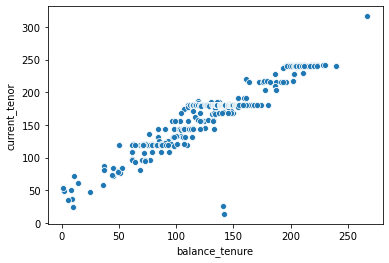

In [27]:
sns.scatterplot(df_prepayment.balance_tenure,df_prepayment.current_tenor)

### Observation

From above results we see that just num_low_freq_transactions may not be a factor driving advance closure. Other features like interest rate changes, emi_amount, pre_emi_recieved_amt are also contributing.

It is difficult to consider 33 dimensions to analyze this behavior. Hence, PCA can help to reduce dimensions and derive patterns

In [28]:
def univariateAnalysis_category(cat_column):
    print("Details of " + cat_column)
    print("----------------------------------------------------------------")
    print(df_cat[cat_column].value_counts())
    plt.figure()
    df_cat[cat_column].value_counts().plot.bar(title="Frequency Distribution of " + cat_column)
    plt.show()
    print("       ")

In [29]:
df_cat = df.select_dtypes(include = ['object'])
lstcatcolumns = list(df_cat.columns.values)
lstcatcolumns

['loan_account', 'gender', 'marital_status', 'qualification', 'city']

In [30]:
lstcatcolumns.remove('loan_account')

Details of gender
----------------------------------------------------------------
M    1994
F     325
Name: gender, dtype: int64


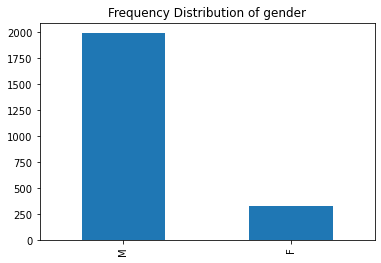

       
Details of marital_status
----------------------------------------------------------------
M    2086
S     233
Name: marital_status, dtype: int64


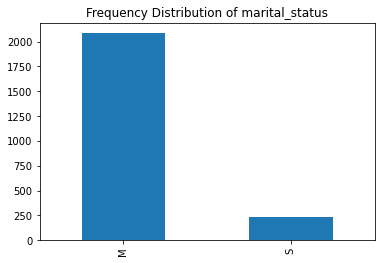

       
Details of qualification
----------------------------------------------------------------
UG          1548
GRAD         409
POSTGRAD     181
OTHERS       150
PRF           18
ENG            6
MAT            5
DOCTRATE       2
Name: qualification, dtype: int64


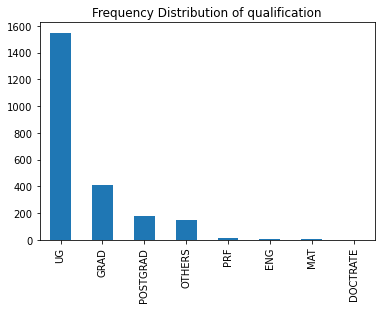

       
Details of city
----------------------------------------------------------------
MUMBAI             607
HYDERABAD          299
AHMEDABAD          165
CHENNAI            164
MADURAI            157
COIMBATORE         156
SURAT              136
ERODE               85
PUNE                78
TIRUCHIRAPPALLI     78
KARUR               65
TUTICORIN           64
TIRUPUR             63
NAMAKKAL            56
WARANGAL            56
BANGALORE           45
VISHAKHAPATNAM      45
Name: city, dtype: int64


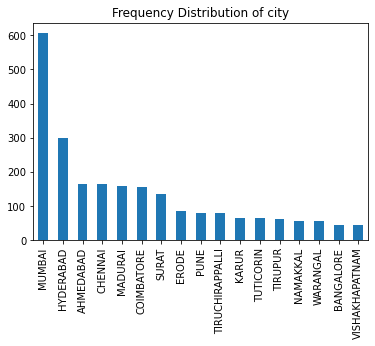

In [31]:
for x in lstcatcolumns:
    univariateAnalysis_category(x)

In [32]:
corr = df_num.corr(method='pearson')

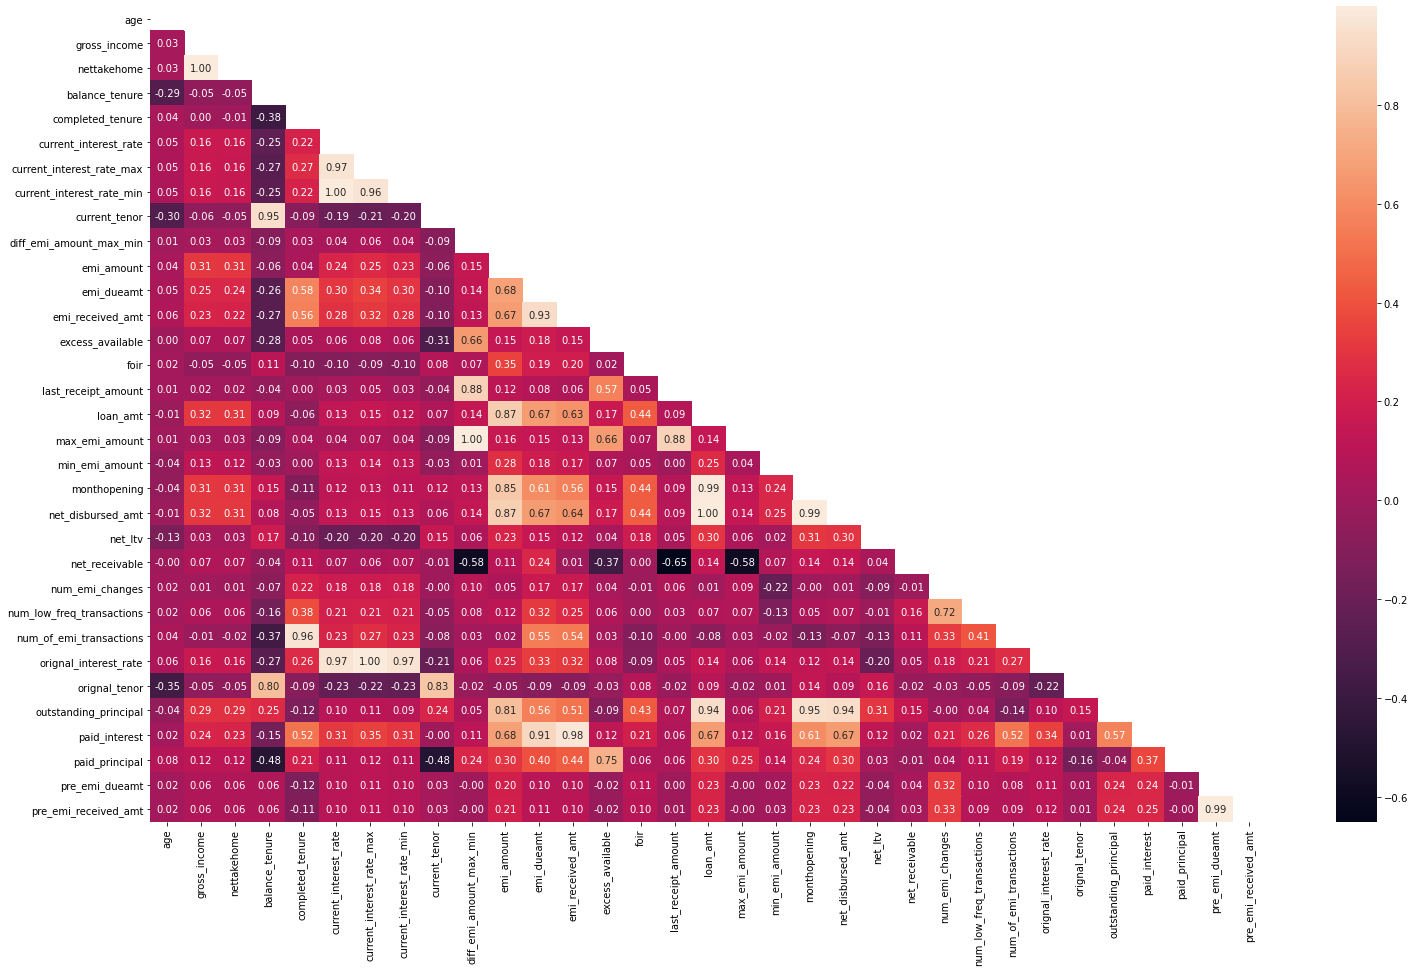

In [33]:
mask = np.triu(np.ones_like(corr, dtype=np.bool)) 
fig = plt.subplots(figsize=(25, 15))
sns.heatmap(df_num.corr(), annot=True,fmt='.2f',mask=mask)
plt.show()

### Outlier Treatment

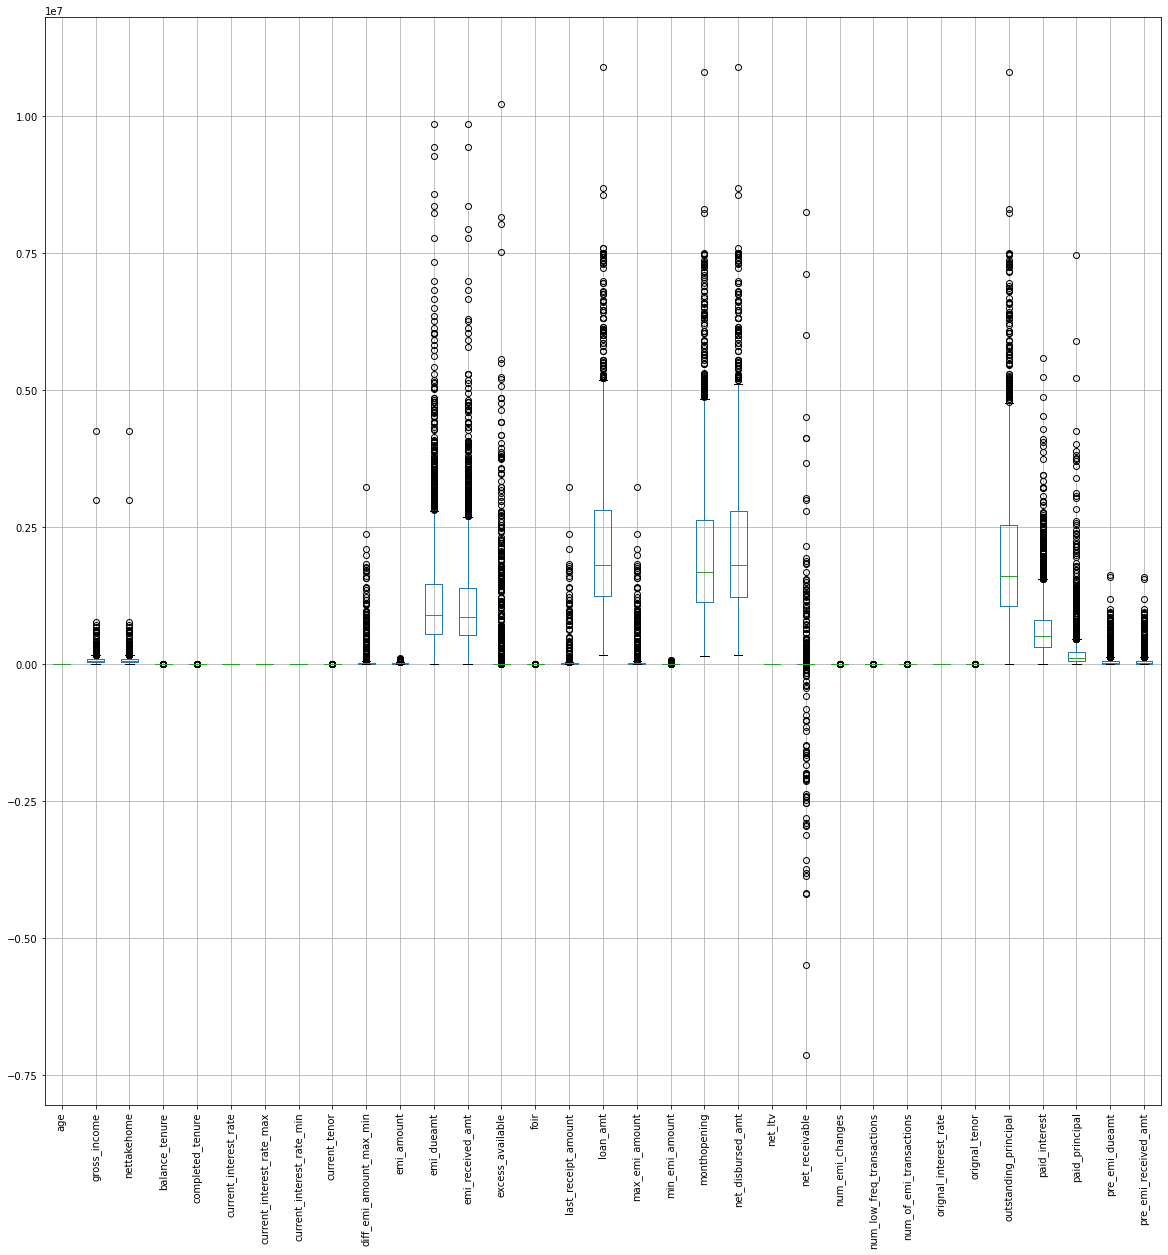

In [34]:
df_num.boxplot(figsize=(20,20))
plt.xticks(rotation=90)
plt.show()

In [35]:
no_outlier = ['age','current_interest_rate','current_interest_rate_max','current_interest_rate_min','net_ltv','orignal_interest_rate']

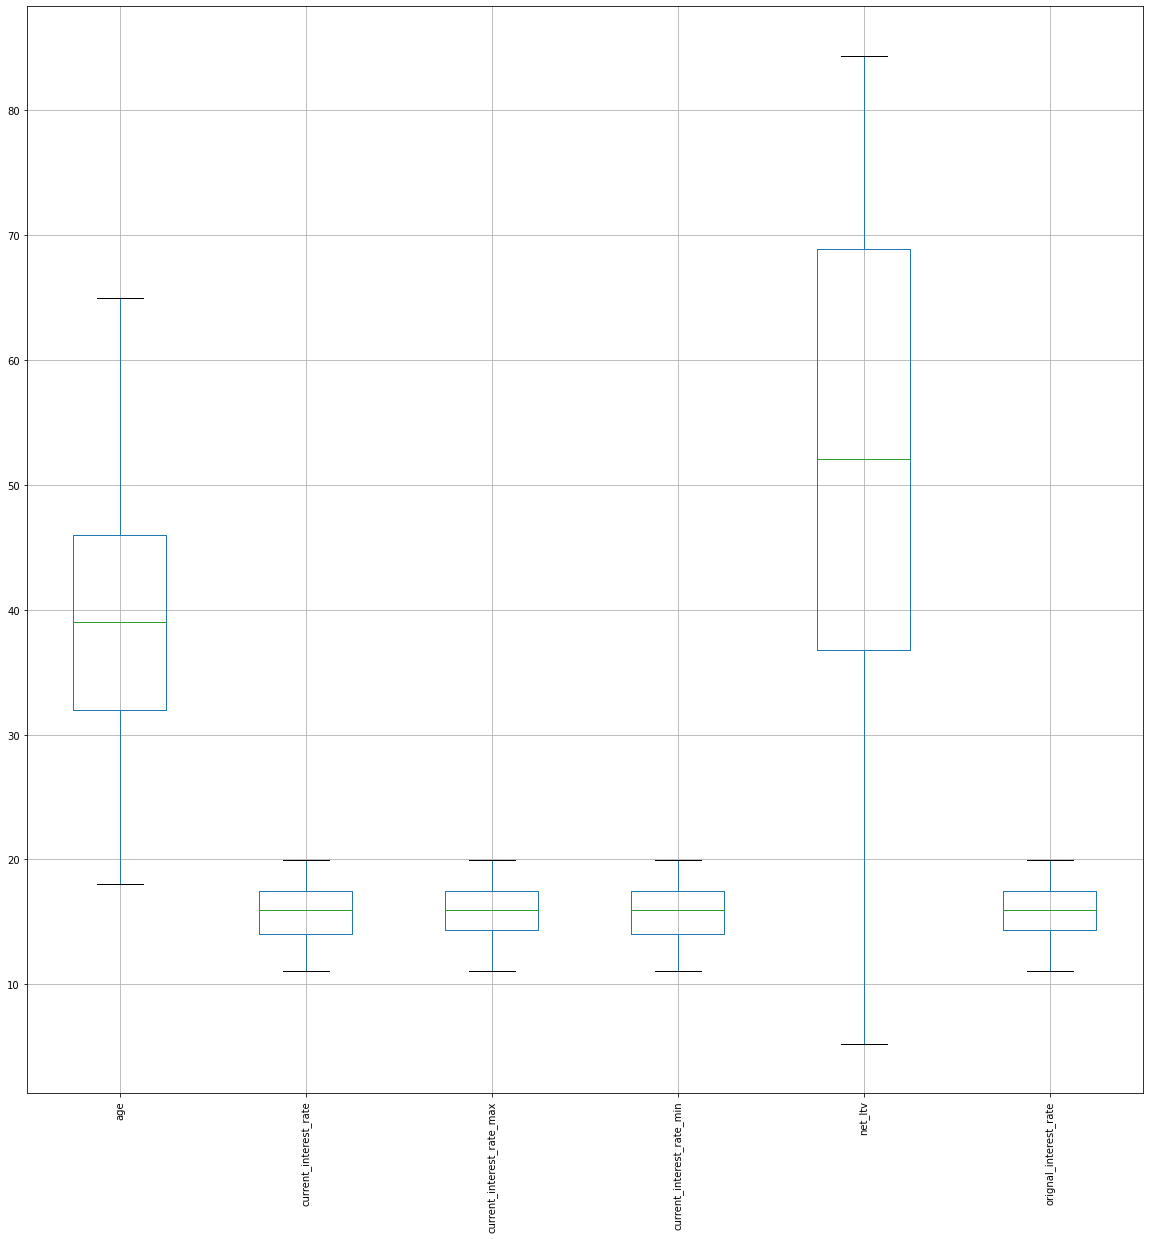

In [36]:
df_num[no_outlier].boxplot(figsize=(20,20))
plt.xticks(rotation=90)
plt.show()

In [37]:
def treat_outlier(x):
    # taking 5,25,75 percentile of column
    q5= np.percentile(x,5)
    q25=np.percentile(x,25)
    q75=np.percentile(x,75)
    dt=np.percentile(x,95)
    #calculationg IQR range
    IQR=q75-q25
    #Calculating minimum threshold
    lower_bound=q25-(1.5*IQR)
    upper_bound=q75+(1.5*IQR)
    #Calculating maximum threshold
    print(q5,q25,q75,dt,min,max)
    #Capping outliers
    return x.apply(lambda y: dt if y > upper_bound else y).apply(lambda y: q5 if y < lower_bound else y)

In [38]:
outlier_list = [x for x in df_num.columns if x not in no_outlier]

In [39]:
for i in df_num[outlier_list]:    
    df_num[i]=treat_outlier(df_num[i])

22519.437 41895.9112427 91189.4575399 195168.454 <built-in function min> <built-in function max>
18495.213608100003 41099.47382080001 90464.01639638201 195168.454 <built-in function min> <built-in function max>
62.0 129.0 167.0 219.0 <built-in function min> <built-in function max>
8.0 22.0 37.0 54.0 <built-in function min> <built-in function max>
96.0 173.0 181.0 240.0 <built-in function min> <built-in function max>
5050.58 10298.5 28604.775 149885.0 <built-in function min> <built-in function max>
5751.3 9727.0 22640.0 41704.29999999998 <built-in function min> <built-in function max>
205981.9274112 551701.8109800001 1453225.007448 3249369.454528798 <built-in function min> <built-in function max>
183520.95357120002 532592.3148 1397185.209 3079018.0965335993 <built-in function min> <built-in function max>
0.0 0.0 3881.7509952 1459853.234202526 <built-in function min> <built-in function max>
0.2 0.34 0.49 0.64 <built-in function min> <built-in function max>
2655.8 9316.0 23077.0 55339.999

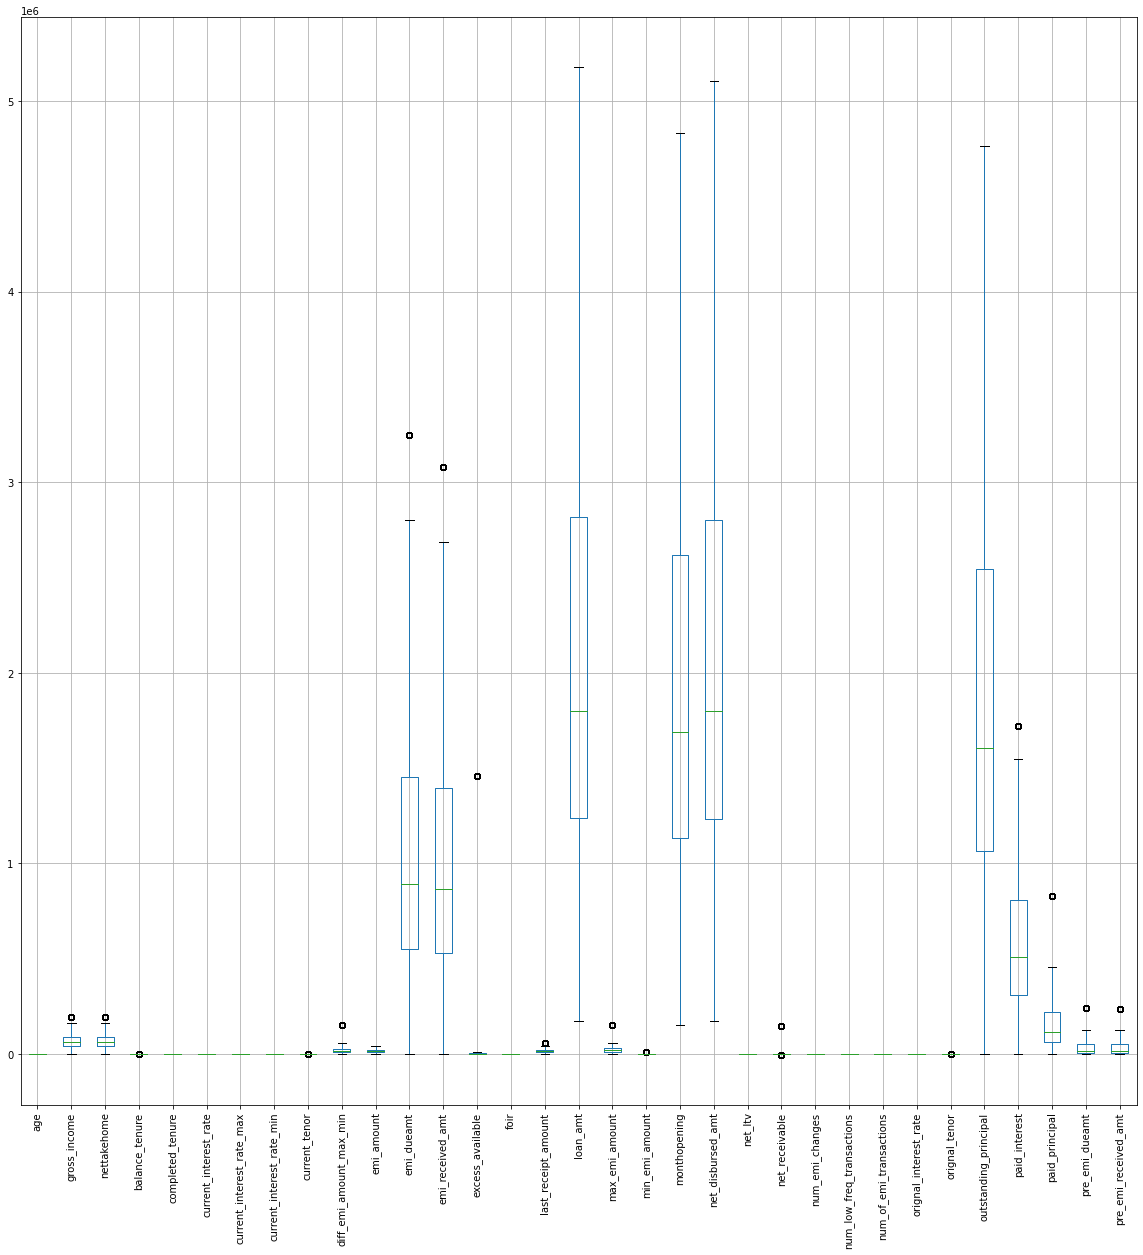

### PCA

In [41]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2319 entries, 0 to 2318
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        2319 non-null   int64  
 1   gross_income               2319 non-null   float64
 2   nettakehome                2319 non-null   float64
 3   balance_tenure             2319 non-null   float64
 4   completed_tenure           2319 non-null   float64
 5   current_interest_rate      2319 non-null   float64
 6   current_interest_rate_max  2319 non-null   float64
 7   current_interest_rate_min  2319 non-null   float64
 8   current_tenor              2319 non-null   float64
 9   diff_emi_amount_max_min    2319 non-null   float64
 10  emi_amount                 2319 non-null   float64
 11  emi_dueamt                 2319 non-null   float64
 12  emi_received_amt           2319 non-null   float64
 13  excess_available           2319 non-null   float

In [42]:
from scipy.stats import zscore
data_new=df_num.apply(zscore)
data_new.head()

,age,gross_income,nettakehome,balance_tenure,completed_tenure,current_interest_rate,current_interest_rate_max,current_interest_rate_min,current_tenor,diff_emi_amount_max_min,...,num_emi_changes,num_low_freq_transactions,num_of_emi_transactions,orignal_interest_rate,orignal_tenor,outstanding_principal,paid_interest,paid_principal,pre_emi_dueamt,pre_emi_received_amt
0,-0.050226,-0.236414,-0.204548,-0.885696,1.936521,0.951154,0.925669,0.957515,0.183447,-0.487809,...,1.736155,1.702129,1.963788,0.943596,-0.001359,-0.822279,0.727758,0.033630,-0.135506,-0.128106
1,1.286008,0.146246,0.170041,-0.983011,1.936521,-0.382421,0.925669,-0.374529,0.054735,-0.439942,...,-0.656620,2.008377,1.963788,0.943596,-0.001359,-0.622608,1.042425,0.383527,0.388638,0.410165
2,0.172479,-0.394019,-0.358828,-2.077804,1.936521,0.951154,0.925669,0.957515,-1.639966,-0.437860,...,2.334348,1.702129,1.963788,0.943596,-1.577073,-1.073859,0.486510,2.661439,-0.163063,-0.156406
3,0.283832,-0.002049,0.024873,-0.910025,1.936521,0.951154,0.925669,0.957515,0.161995,0.166150,...,2.334348,2.314625,1.963788,0.943596,-0.001359,-0.129192,2.556239,0.646972,-0.278420,-0.274871
4,-1.386461,-0.220899,-0.189360,-0.861367,1.936521,0.951154,0.925669,0.957515,0.183447,0.018416,...,2.334348,1.702129,1.963788,0.943596,-0.001359,-0.351567,1.709418,0.402387,-0.053284,-0.043667


In [42]:
#data_new.to_excel('Scaled STHL.xlsx')

In [43]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2319 entries, 0 to 2318
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        2319 non-null   float64
 1   gross_income               2319 non-null   float64
 2   nettakehome                2319 non-null   float64
 3   balance_tenure             2319 non-null   float64
 4   completed_tenure           2319 non-null   float64
 5   current_interest_rate      2319 non-null   float64
 6   current_interest_rate_max  2319 non-null   float64
 7   current_interest_rate_min  2319 non-null   float64
 8   current_tenor              2319 non-null   float64
 9   diff_emi_amount_max_min    2319 non-null   float64
 10  emi_amount                 2319 non-null   float64
 11  emi_dueamt                 2319 non-null   float64
 12  emi_received_amt           2319 non-null   float64
 13  excess_available           2319 non-null   float

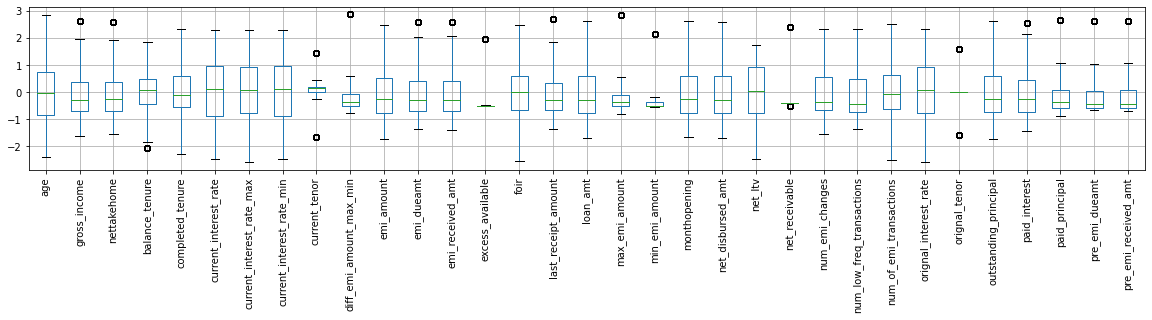

In [44]:
data_new.boxplot(figsize=(20,3))
plt.xticks(rotation=90)
plt.show()

### Bartletts Test of Sphericity
Checks for reasonable correlation between the observed variables. PCA is applied if there is a significant correlation.

If Null Hypothesis is rejected it means there is a significant correlation and PCA can be applied.

Hence we expect p-value < 0.05 from the test to proceed further

In [45]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(data_new)
p_value

0.0

### KMO Test

It used to check for sample adequecy before proceeding with PCA

KMO of greater than 0.6 indicates that sample size is adequate for getting the components

In [46]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(data_new)
kmo_model

0.8183633874082272

In [47]:
cov_matrix = np.cov(data_new.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.00043141e+00  6.80109127e-02  5.53026578e-02 ...  1.55193039e-01
   2.24303213e-02  2.12952078e-02]
 [ 6.80109127e-02  1.00043141e+00  9.79193180e-01 ...  2.48768895e-01
   9.37601368e-02  9.41927683e-02]
 [ 5.53026578e-02  9.79193180e-01  1.00043141e+00 ...  2.25852423e-01
   9.49715761e-02  9.52872106e-02]
 ...
 [ 1.55193039e-01  2.48768895e-01  2.25852423e-01 ...  1.00043141e+00
  -1.26091479e-03  4.82686910e-04]
 [ 2.24303213e-02  9.37601368e-02  9.49715761e-02 ... -1.26091479e-03
   1.00043141e+00  9.99144872e-01]
 [ 2.12952078e-02  9.41927683e-02  9.52872106e-02 ...  4.82686910e-04
   9.99144872e-01  1.00043141e+00]]


In [48]:
# Step 2- Get eigen values and eigen vector
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('\n Eigen Values \n %s', eig_vals)
print('\n')
print('Eigen Vectors \n %s', eig_vecs)


 Eigen Values 
 %s [9.68563597e+00 5.00214971e+00 3.01844051e+00 2.68267344e+00
 2.29595444e+00 1.79841472e+00 1.43282900e+00 1.22319906e+00
 9.52609710e-01 8.73557748e-01 7.55254525e-01 6.87513756e-01
 5.33635782e-01 4.96172449e-01 3.87724288e-01 3.12538005e-01
 2.19351634e-01 1.67551711e-01 1.26061054e-01 1.12297445e-01
 5.76376440e-02 4.46139522e-02 4.22677817e-02 3.66247520e-02
 2.01745453e-02 1.58692433e-02 1.41246514e-02 8.77246408e-03
 3.66840154e-03 3.38679739e-03 1.10623498e-03 1.24877872e-03
 1.17620823e-03]


Eigen Vectors 
 %s [[-2.00599872e-02 -1.00949508e-01 -9.32346980e-02 ... -1.29165131e-03
  -6.45828393e-04 -1.57432225e-03]
 [-2.17250695e-01  3.19730995e-02  1.08963941e-01 ... -2.06554523e-03
   1.21990058e-03  2.11200283e-03]
 [-2.08546205e-01  3.55363538e-02  1.16490766e-01 ... -1.38471510e-04
  -2.68668958e-03 -1.55522431e-03]
 ...
 [-1.60470409e-01 -1.19222076e-01 -3.13989848e-01 ... -1.34713150e-03
   1.41066574e-03  1.96828408e-03]
 [-7.29292262e-02  1.20757651

Cumulative Variance Explained [ 29.33775554  44.48924852  53.63209365  61.75790159  68.7123391
  74.15973063  78.49976436  82.2048298   85.09028109  87.73628427
  90.02394744  92.10642406  93.72280487  95.22570938  96.40012482
  97.34680128  98.01121657  98.51873008  98.90056854  99.24071709
  99.4153013   99.5504368   99.67846575  99.78940199  99.85051061
  99.89857849  99.94136201  99.96793377  99.97904535  99.98930394
  99.99308649  99.99664922 100.        ]


## Scree plot

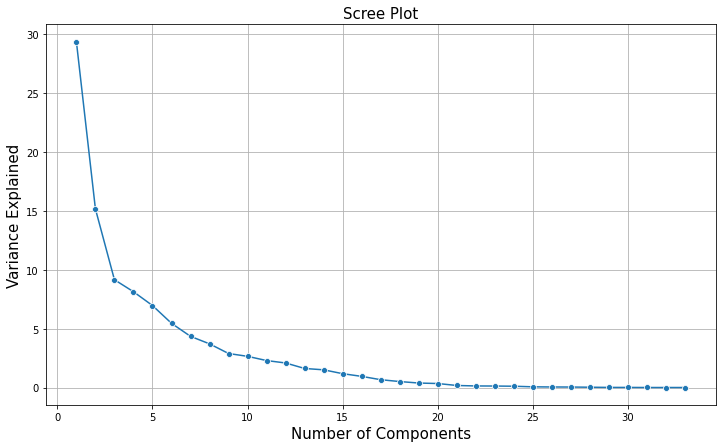

In [50]:
plt.figure(figsize=(12,7))
sns.lineplot(y=var_exp,x=range(1,len(var_exp)+1),marker='o')
plt.xlabel('Number of Components',fontsize=15)
plt.ylabel('Variance Explained',fontsize=15)
plt.title('Scree Plot',fontsize=15)
plt.grid()
plt.show()

In [51]:
# Using scikit learn PCA here. It does all the above steps and maps data to PCA dimensions in one shot
from sklearn.decomposition import PCA
# NOTE - we are generating only 8 PCA dimensions (dimensionality reduction from 33 to 8)
pca = PCA(n_components=8, random_state=123)
data_reduced = pca.fit_transform(data_new)
data_reduced.transpose()

array([[ 0.14385116,  0.63525361,  1.04514542, ..., -3.01113155,
        -1.64566467, -3.0189911 ],
       [-3.9470272 , -2.86527171, -5.88986118, ...,  0.43539934,
         0.81352264,  0.28712247],
       [ 0.00725909,  1.09955082,  1.81399317, ..., -0.66094406,
         0.07493479,  2.9017319 ],
       ...,
       [ 0.31613444,  1.56373479,  0.26300569, ..., -0.78838629,
        -0.98144607,  0.15788365],
       [ 0.42807803,  0.43884954,  1.84969266, ..., -0.15021073,
         2.27346876,  0.10606252],
       [ 0.36948733,  0.47675436, -0.45433561, ..., -0.55890126,
        -1.47110545, -0.72545326]])

In [52]:
pca.components_

array([[ 2.00599872e-02,  2.17250695e-01,  2.08546205e-01,
        -6.96930938e-02,  9.11277801e-02,  1.49328452e-01,
         1.56807539e-01,  1.47410675e-01, -4.13709993e-02,
         1.86263803e-01,  2.80550292e-01,  2.78083979e-01,
         2.68330855e-01,  4.89747898e-02,  1.08928493e-01,
         2.40577190e-01,  2.74912782e-01,  1.95895142e-01,
         3.23956079e-02,  2.64775367e-01,  2.76049166e-01,
         6.06459725e-02,  7.52379092e-02,  7.34592236e-02,
         9.99594952e-02,  8.98967622e-02,  1.55054851e-01,
        -3.89837008e-02,  2.41758707e-01,  2.75505693e-01,
         1.60470409e-01,  7.29292262e-02,  7.37629149e-02],
       [-1.00949507e-01,  3.19730994e-02,  3.55363536e-02,
         3.08341667e-01, -2.52104312e-01, -2.68787934e-01,
        -2.73912706e-01, -2.70065522e-01,  2.44699548e-01,
         3.62624126e-02,  1.21089904e-01, -6.10500608e-02,
        -6.07894720e-02, -5.46056408e-02,  1.61359358e-01,
         8.68839377e-02,  2.05625570e-01,  4.24004710e-

In [53]:
pca.explained_variance_ratio_

array([0.29337756, 0.15151493, 0.09142845, 0.08125808, 0.06954438,
       0.05447392, 0.04340034, 0.03705065])

In [54]:
df_comp = pd.DataFrame(pca.components_,columns=list(data_new))
df_comp.shape

(8, 33)

In [55]:
df_comp.head(8)

,age,gross_income,nettakehome,balance_tenure,completed_tenure,current_interest_rate,current_interest_rate_max,current_interest_rate_min,current_tenor,diff_emi_amount_max_min,...,num_emi_changes,num_low_freq_transactions,num_of_emi_transactions,orignal_interest_rate,orignal_tenor,outstanding_principal,paid_interest,paid_principal,pre_emi_dueamt,pre_emi_received_amt
0,0.020060,0.217251,0.208546,-0.069693,0.091128,0.149328,0.156808,0.147411,-0.041371,0.186264,...,0.073459,0.099959,0.089897,0.155055,-0.038984,0.241759,0.275506,0.160470,0.072929,0.073763
1,-0.100950,0.031973,0.035536,0.308342,-0.252104,-0.268788,-0.273913,-0.270066,0.244700,0.036262,...,-0.123617,-0.145332,-0.259216,-0.274643,0.238072,0.241683,-0.032980,-0.119222,0.012076,0.010834
2,0.093235,-0.108964,-0.116491,-0.250247,0.216649,-0.338187,-0.319923,-0.338043,-0.211685,0.173265,...,0.012462,0.084367,0.183259,-0.322125,-0.132440,-0.097446,0.070239,0.313990,-0.153838,-0.153293
3,-0.186583,-0.171115,-0.171926,0.250160,0.280332,-0.045029,-0.037589,-0.045649,0.363109,-0.008406,...,0.339736,0.310606,0.330743,-0.038842,0.341880,-0.011931,0.168316,-0.114135,0.155048,0.155122
4,0.114183,-0.029151,-0.024066,-0.073722,-0.265154,-0.044484,-0.055185,-0.043028,-0.171800,0.207315,...,0.349120,0.166932,-0.150414,-0.052744,-0.159810,-0.026543,-0.148292,0.019624,0.465167,0.464486
5,0.156770,-0.029345,-0.031962,-0.110087,0.093009,-0.107608,-0.091722,-0.107130,-0.108959,-0.384747,...,-0.088010,-0.231421,0.169289,-0.089491,-0.146481,0.073145,0.169302,0.016886,0.358439,0.359740
6,0.197758,0.247934,0.253187,-0.057789,-0.024580,-0.078047,-0.103553,-0.075663,-0.096056,-0.192284,...,0.192369,0.319291,-0.052029,-0.104447,-0.209450,0.100443,-0.060731,-0.172893,-0.162275,-0.164320
7,-0.148006,0.465071,0.477981,0.038385,0.063822,-0.107587,-0.096758,-0.108030,0.085517,-0.001645,...,0.007129,-0.062812,0.087064,-0.095952,0.147820,-0.086186,0.022629,0.096881,0.109268,0.110759


In [56]:
#df_comp.to_excel('pca_components.xlsx')

In [58]:
from matplotlib.patches import Rectangle

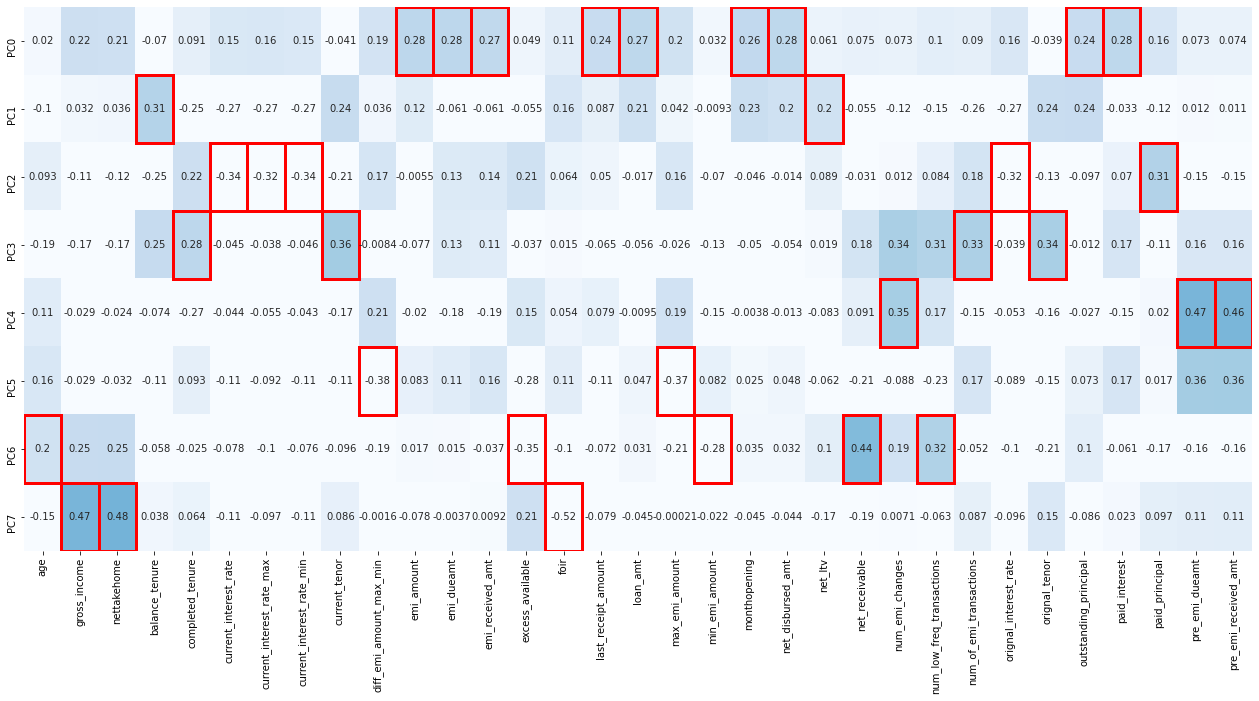

In [78]:
fig,ax = plt.subplots(figsize=(22, 10), facecolor='w', edgecolor='k')
ax = sns.heatmap(df_comp, annot=True, vmax=1.0, vmin=0, cmap='Blues', cbar=False, fmt='.2g', ax=ax,
                 yticklabels=['PC0','PC1','PC2','PC3','PC4','PC5','PC6','PC7'])

column_max = df_comp.abs().idxmax(axis=0)
#print(column_max)

for col, variable in enumerate(df_comp.columns):
    position = column_max[variable]
    #position = df_comp.index.get_loc(column_max[variable])
    ax.add_patch(Rectangle((col, position),1,1, fill=False, edgecolor='red', lw=3))

In [64]:
column_max.index

Index(['age', 'gross_income', 'nettakehome', 'balance_tenure',
       'completed_tenure', 'current_interest_rate',
       'current_interest_rate_max', 'current_interest_rate_min',
       'current_tenor', 'diff_emi_amount_max_min', 'emi_amount', 'emi_dueamt',
       'emi_received_amt', 'excess_available', 'foir', 'last_receipt_amount',
       'loan_amt', 'max_emi_amount', 'min_emi_amount', 'monthopening',
       'net_disbursed_amt', 'net_ltv', 'net_receivable', 'num_emi_changes',
       'num_low_freq_transactions', 'num_of_emi_transactions',
       'orignal_interest_rate', 'orignal_tenor', 'outstanding_principal',
       'paid_interest', 'paid_principal', 'pre_emi_dueamt',
       'pre_emi_received_amt'],
      dtype='object')

In [59]:
df_pc = pd.DataFrame(data_reduced,columns=['pc_loan_repayment','pc_balance_loan','pc_interest_rate','pc_completed_tenure',
                                  'pc_pre_emi','pc_emi','pc_receiveable','pc_income'])

In [60]:
df_new = pd.concat([df_cat, df_pc], axis=1)

In [61]:
df_new.shape

(2319, 13)

In [62]:
df_new.head()

,loan_account,gender,marital_status,qualification,city,pc_loan_repayment,pc_balance_loan,pc_interest_rate,pc_completed_tenure,pc_pre_emi,pc_emi,pc_receiveable,pc_income
0,LA492,F,M,UG,MADURAI,0.143851,-3.947027,0.007259,2.540247,-0.752165,0.316134,0.428078,0.369487
1,LA498,M,M,GRAD,MADURAI,0.635254,-2.865272,1.099551,1.704176,-0.895864,1.563735,0.438850,0.476754
2,LA500,M,M,UG,MADURAI,1.045145,-5.889861,1.813993,1.493827,0.396679,0.263006,1.849693,-0.454336
3,LA531,M,M,UG,MADURAI,3.699938,-3.578738,1.082576,3.720673,-1.031922,-0.079366,1.873200,-0.654889
4,LA552,M,S,GRAD,MADURAI,2.388491,-3.702335,0.849655,3.611139,-0.321922,-1.044952,0.336398,0.263910


In [63]:
df_new.describe(include='all')

,loan_account,gender,marital_status,qualification,city,pc_loan_repayment,pc_balance_loan,pc_interest_rate,pc_completed_tenure,pc_pre_emi,pc_emi,pc_receiveable,pc_income
count,2319,2319,2319,2319,2319,2.319000e+03,2.319000e+03,2.319000e+03,2.319000e+03,2.319000e+03,2.319000e+03,2.319000e+03,2.319000e+03
unique,2319,2,2,8,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,LA4408,M,M,UG,MUMBAI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,1994,2086,1548,607,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,1.276924e-15,1.301245e-16,1.951388e-16,-2.876335e-16,1.301245e-16,3.260293e-17,-1.000828e-16,4.706120e-17
std,NaN,NaN,NaN,NaN,NaN,3.112175e+00,2.236549e+00,1.737366e+00,1.637887e+00,1.515241e+00,1.341050e+00,1.197008e+00,1.105983e+00
min,NaN,NaN,NaN,NaN,NaN,-5.757613e+00,-5.972925e+00,-5.117150e+00,-5.277650e+00,-4.500467e+00,-4.745399e+00,-4.090521e+00,-3.810592e+00
25%,NaN,NaN,NaN,NaN,NaN,-2.261921e+00,-1.629548e+00,-1.167472e+00,-1.137215e+00,-9.897044e-01,-7.204773e-01,-7.460036e-01,-7.155825e-01
50%,NaN,NaN,NaN,NaN,NaN,-6.389708e-01,-4.937553e-02,-1.160588e-01,4.534700e-02,-2.547205e-01,5.341150e-02,-1.917729e-02,-5.464028e-02
75%,NaN,NaN,NaN,NaN,NaN,1.610693e+00,1.610316e+00,1.099968e+00,1.125533e+00,7.679613e-01,7.614636e-01,7.458428e-01,6.253803e-01


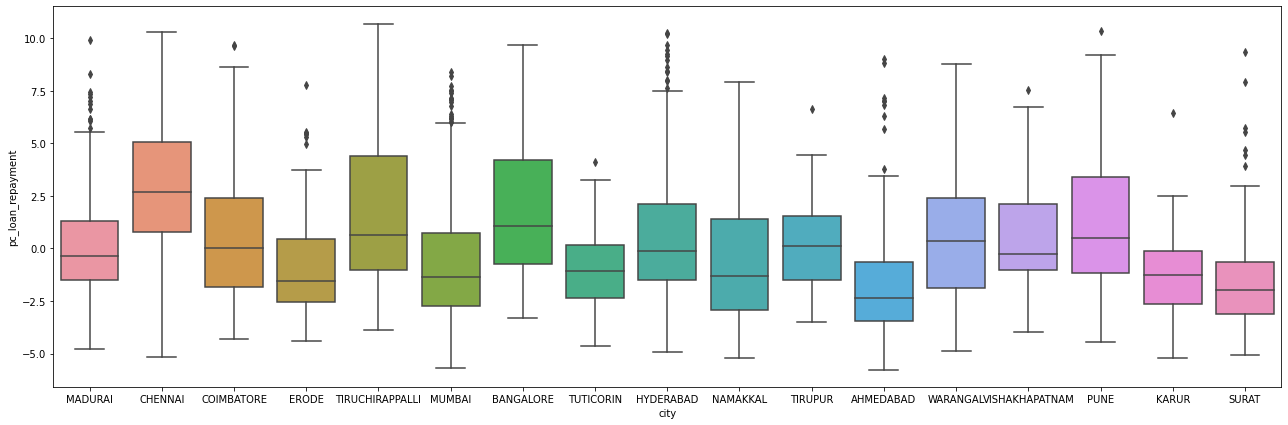

In [64]:
fig,ax = plt.subplots(figsize=(22,7))
sns.boxplot(x='city',y='pc_loan_repayment', data=df_new)

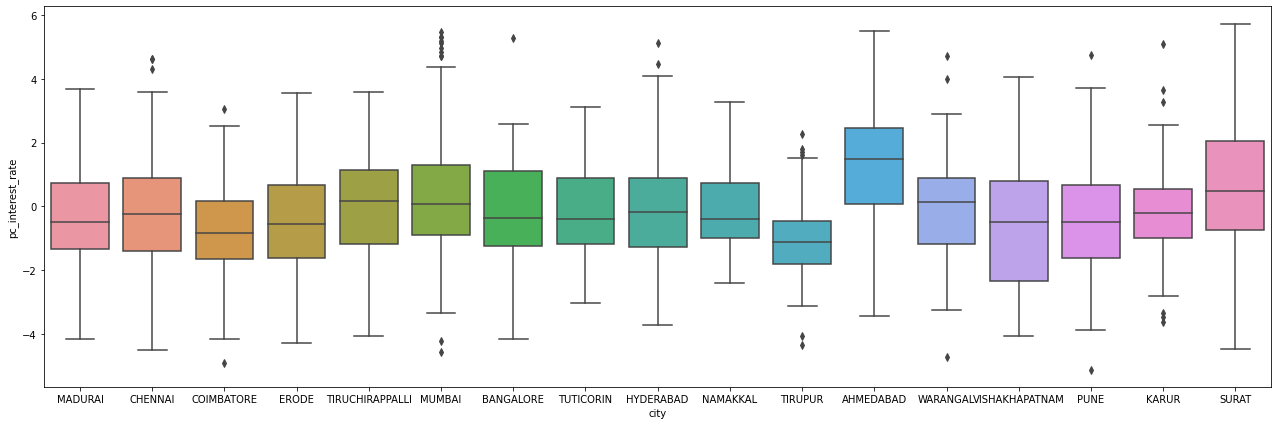

In [65]:
fig,ax = plt.subplots(figsize=(22,7))
sns.boxplot(x='city',y='pc_interest_rate', data=df_new)

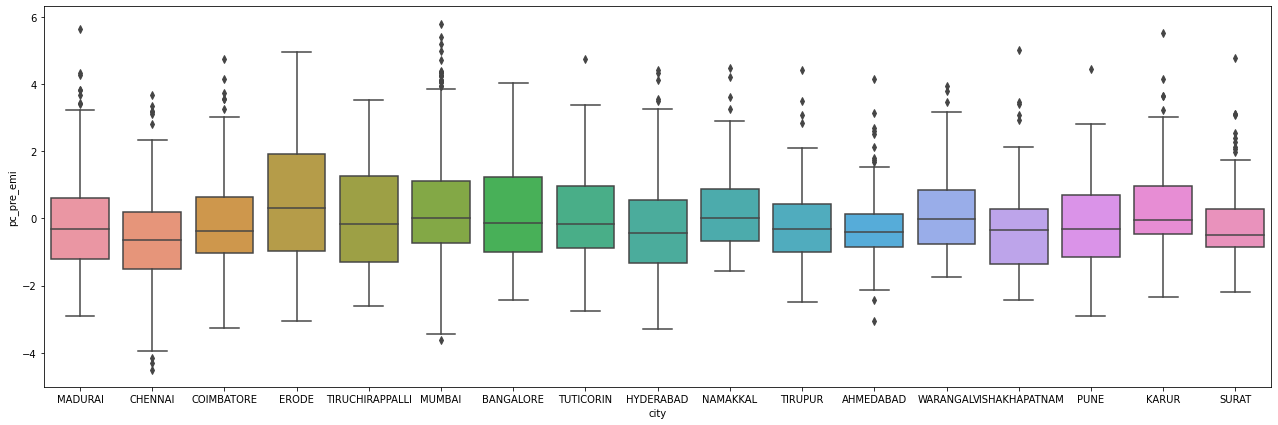

In [66]:
fig,ax = plt.subplots(figsize=(22,7))
sns.boxplot(x='city',y='pc_pre_emi', data=df_new)

### Observation

- From above plots we observe that for city like Ahmedabad, loan replayment amount is comparatively lower than other cities however, the interest rate charged to the customers is much higher

- For city like Erode, loan repayment amount is low, interest rate is comparative high and the pre-emi amount paid by customers from this city is also high

Customer who has to pay lesser loan, has done some payment as part of pre-emi and has an high income have higher chances to do advance payment and close the loan in advance thus causing loss to the financial institute

In [67]:
cond1 = df_new.pc_loan_repayment < df_new.pc_loan_repayment.quantile(0.25)
cond2 = df_new.pc_pre_emi > df_new.pc_pre_emi.quantile(0.75)
cond3 = df_new.pc_income > df_new.pc_income.quantile(0.75)
df_adv_closure = df_new[cond1 & cond2 & cond3]

In [68]:
df_adv_closure.index

Int64Index([ 251,  915, 1057, 1148, 1216, 1247, 1408, 1414, 1428, 1486, 1495,
            1496, 1661, 1747, 1782, 1800, 1834, 1840, 1846, 1871, 1899, 2002,
            2032, 2114, 2141, 2147, 2163, 2240, 2304],
           dtype='int64')

In [69]:
df_adv_closure=df_adv_closure.assign(advance_closure=1)

In [70]:
df_merge = df.merge(df_adv_closure['advance_closure'],left_index=True,left_on=df.index, right_index=True, 
                    right_on=df_adv_closure.index, how='left')
df_merge.head()

,loan_account,age,gender,marital_status,qualification,gross_income,nettakehome,balance_tenure,city,completed_tenure,...,num_low_freq_transactions,num_of_emi_transactions,orignal_interest_rate,orignal_tenor,outstanding_principal,paid_interest,paid_principal,pre_emi_dueamt,pre_emi_received_amt,advance_closure
0,LA492,39,F,M,UG,63542.344735,63542.344735,111,MADURAI,70,...,10,73,17.479728,180,9.882910e+05,9.340537e+05,212745.625226,39959.331336,39959.331336,NaN
1,LA498,51,M,M,GRAD,81130.025032,81130.025032,107,MADURAI,68,...,11,73,17.479728,180,1.206218e+06,1.069305e+06,295078.188194,78774.632736,78774.632736,NaN
2,LA500,41,M,M,UG,56298.592500,56298.592500,50,MADURAI,70,...,10,73,17.479728,120,7.137100e+05,8.303592e+05,487326.621863,37918.629288,37918.629288,NaN
3,LA531,42,M,M,UG,74314.142100,74314.142100,110,MADURAI,70,...,17,72,17.479728,180,1.744746e+06,1.567354e+06,357068.193072,29375.950152,29375.950152,NaN
4,LA552,27,M,S,GRAD,64255.460240,64255.460240,112,MADURAI,69,...,10,71,17.479728,180,1.502039e+06,1.355995e+06,299516.018579,46048.309200,46048.309200,NaN


In [71]:
df_merge.advance_closure.value_counts()

1.0    29
Name: advance_closure, dtype: int64

In [72]:
df_merge.advance_closure.fillna(0, inplace=True)

In [73]:
df_merge.advance_closure.value_counts()

0.0    2290
1.0      29
Name: advance_closure, dtype: int64

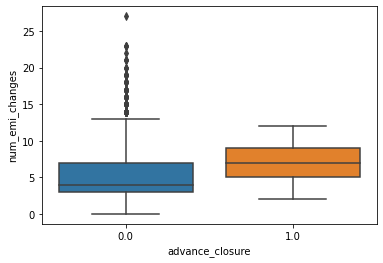

In [74]:
sns.boxplot(df_merge.advance_closure, df_merge.num_emi_changes)

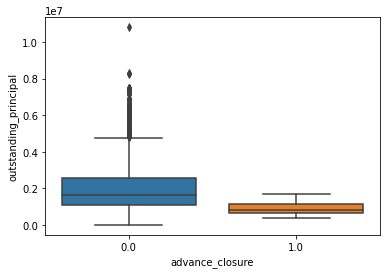

In [75]:
sns.boxplot(df_merge.advance_closure, df_merge.outstanding_principal)

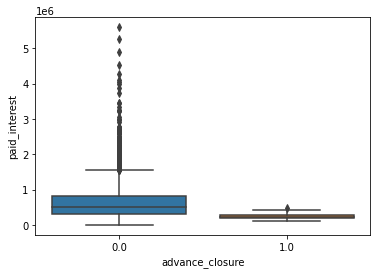

In [76]:
sns.boxplot(df_merge.advance_closure, df_merge.paid_interest)

### Observation:

29 customers have low outstanding principal, have paid less interest so far and we also see that there are more changes in emi value being paid. Hence, there is high probability that these customers may close the loans in advance

Customers with high loan, low income and high loan interest rate are probable customers to default. 

In [77]:
cond1 = df_new.pc_loan_repayment > df_new.pc_loan_repayment.quantile(0.75)
cond2 = df_new.pc_income < df_new.pc_income.quantile(0.25)
cond3 = df_new.pc_interest_rate > df_new.pc_interest_rate.quantile(0.75)

df_delay_closure = df_new[cond1 & cond2 & cond3]

In [78]:
df_delay_closure.index

Int64Index([   8,   78,   86,  133,  148,  151,  162,  165,  240,  255,  315,
             317,  319,  361,  399,  538,  575,  610,  612,  627,  637,  656,
             750,  789,  801,  865,  889,  890,  943, 1070, 1138, 1160, 1185,
            1201, 1252, 1256, 1310, 1344, 1351, 1465, 1504, 1671, 1722, 1727,
            1743, 1763, 1815, 1863, 1888, 1940, 1973, 2045, 2052, 2076, 2176],
           dtype='int64')

In [79]:
df_delay_closure = df_delay_closure.assign(delay_closure=1)

In [80]:
df_merge = df.merge(df_delay_closure['delay_closure'],left_index=True,left_on=df.index, right_index=True, 
                    right_on=df_delay_closure.index, how='left')
df_merge.head()

,loan_account,age,gender,marital_status,qualification,gross_income,nettakehome,balance_tenure,city,completed_tenure,...,num_low_freq_transactions,num_of_emi_transactions,orignal_interest_rate,orignal_tenor,outstanding_principal,paid_interest,paid_principal,pre_emi_dueamt,pre_emi_received_amt,delay_closure
0,LA492,39,F,M,UG,63542.344735,63542.344735,111,MADURAI,70,...,10,73,17.479728,180,9.882910e+05,9.340537e+05,212745.625226,39959.331336,39959.331336,NaN
1,LA498,51,M,M,GRAD,81130.025032,81130.025032,107,MADURAI,68,...,11,73,17.479728,180,1.206218e+06,1.069305e+06,295078.188194,78774.632736,78774.632736,NaN
2,LA500,41,M,M,UG,56298.592500,56298.592500,50,MADURAI,70,...,10,73,17.479728,120,7.137100e+05,8.303592e+05,487326.621863,37918.629288,37918.629288,NaN
3,LA531,42,M,M,UG,74314.142100,74314.142100,110,MADURAI,70,...,17,72,17.479728,180,1.744746e+06,1.567354e+06,357068.193072,29375.950152,29375.950152,NaN
4,LA552,27,M,S,GRAD,64255.460240,64255.460240,112,MADURAI,69,...,10,71,17.479728,180,1.502039e+06,1.355995e+06,299516.018579,46048.309200,46048.309200,NaN


In [81]:
df_merge.delay_closure.value_counts()

1.0    55
Name: delay_closure, dtype: int64

In [82]:
df_merge.delay_closure.fillna(0, inplace=True)

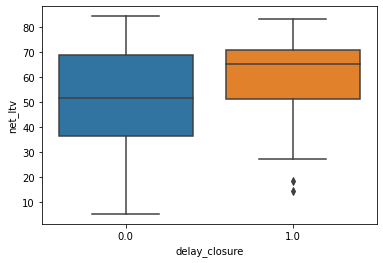

In [83]:
sns.boxplot(df_merge.delay_closure, df_merge.net_ltv)

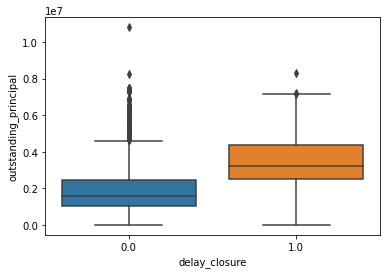

In [84]:
sns.boxplot(df_merge.delay_closure, df_merge.outstanding_principal)

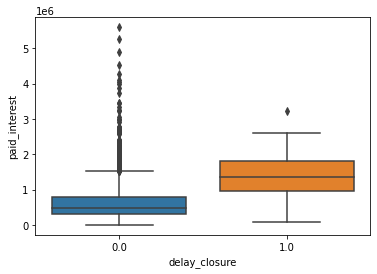

In [85]:
sns.boxplot(df_merge.delay_closure, df_merge.paid_interest)

### Observation:
55 customers have high outstanding principal, have interest to be paid and we also see that their loan to value ratio is higher. Hence, there is high probability that these customers may default in future

### Conclusion

With help of PCA we have been able to reduce 33 numeric features into 8 components which is able to explain 82% of variance in the data

With help of reduced components we have been able to observe some patterns. Using some rules around business context we are able to shortlist few customers who need to be monitored closely either for advance closure (29 out of 2319) or for possible default case (55 out of 2319).

Using the components additional rules can be derived and analyzed. 

Unsupervised learning like clustering can further be applied on the data to segment the customers based on the components created and further analyzed.